In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from scipy import stats
from sklearn. metrics import roc_curve, auc
import numpy as np
import random
import matplotlib.pyplot as plt
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from sklearn.calibration import CalibrationDisplay
from sklearn. metrics import roc_curve, auc
from sklearn.metrics import accuracy_score

In [3]:
data = pd.read_excel("C:\\Users\\12292\\Desktop\\train size - xx (2).xlsx")

In [4]:
train_X = data.iloc[:, 1:]  # Features (excluding the first column)
train_y = data.iloc[:, 0] 

In [5]:
train_X

,BNF,PHASES,Radscore
0,1.260731,4,0.446201
1,1.385450,9,2.553235
2,1.410795,0,-1.116113
3,0.930106,0,-1.127136
4,1.066182,0,-1.669537
...,...,...,...
328,1.266495,1,-0.748227
329,1.018247,1,-1.270338
330,0.658511,5,0.754189
331,1.007611,6,-0.795665


In [6]:
data_test = pd.read_excel("C:\\Users\\12292\\Desktop\\test size - xx (2).xlsx")

In [7]:
test_y = data_test.iloc[:, 0] 

In [8]:
test_y

0      0
1      0
2      0
3      1
4      0
      ..
137    0
138    0
139    1
140    0
141    1
Name: status, Length: 142, dtype: int64

In [9]:
test_X = data_test.iloc[:, 1:] 

test_X

,BNF,PHASES,Radscore
0,1.599177,6,-0.199217
1,1.277627,4,0.417314
2,0.932445,1,-0.781816
3,0.956438,5,-0.183729
4,1.548727,3,-0.510796
...,...,...,...
137,1.190633,4,-1.118190
138,1.035633,0,-1.140353
139,1.178697,4,1.206319
140,1.069052,0,-1.283198


For n_estimators=10, best parameter combination: {'n_estimators': 10}, best score: 0.8318181818181818
Corresponding training set AUC: 0.9329237071172555, test set AUC: 0.8966169154228857
Difference between training set AUC and test set AUC: 0.03630679169436979
For n_estimators=20, best parameter combination: {'n_estimators': 20}, best score: 0.8378787878787879
Corresponding training set AUC: 0.9503328213005633, test set AUC: 0.8877611940298508
Difference between training set AUC and test set AUC: 0.06257162727071253
For n_estimators=30, best parameter combination: {'n_estimators': 30}, best score: 0.8197860962566844
Corresponding training set AUC: 0.9598237144320093, test set AUC: 0.888955223880597
Difference between training set AUC and test set AUC: 0.07086849055141231
For n_estimators=40, best parameter combination: {'n_estimators': 40}, best score: 0.8080213903743315
Corresponding training set AUC: 0.9718747714139419, test set AUC: 0.8925373134328358
Difference between training set

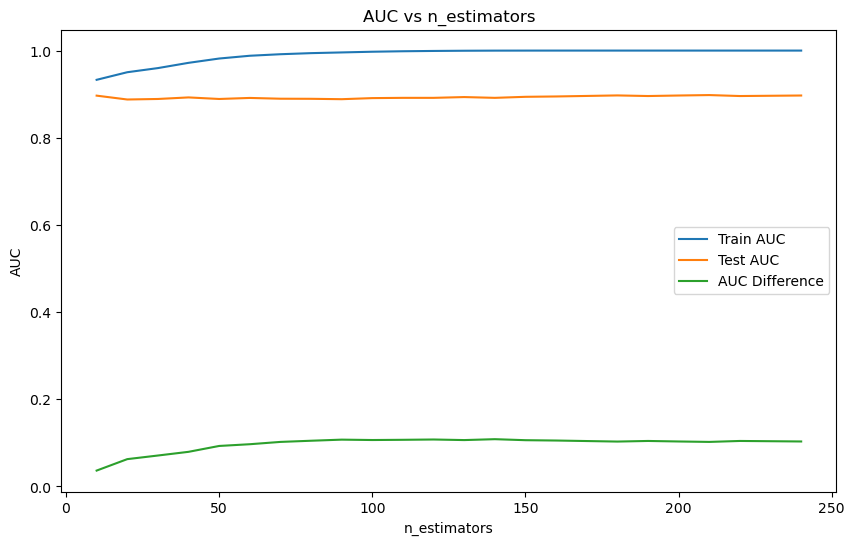

In [10]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

# Create a LightGBM classifier, set the random_state parameter, and suppress warnings
best_LGBM = lgb.LGBMClassifier(random_state=321, verbose=-1)

# Define the parameter grid
param_grid = {
    'learning_rate': [0.006],
    'n_estimators': list(range(10, 250, 10)),  # From 10 to 240 with a step of 10
}

train_auc_scores = []
test_auc_scores = []
auc_diffs = []

# Use grid search to find the best hyperparameter combination
for n_estimators in param_grid['n_estimators']:
    param_grid_single = {'n_estimators': [n_estimators]}
    grid_search = GridSearchCV(best_LGBM, param_grid=param_grid_single, cv=10, scoring='accuracy', n_jobs=-1)
    grid_search.fit(train_X, train_y)
    
    # Calculate the AUC for the training and test sets
    train_pred = grid_search.predict_proba(train_X)[:, 1]
    test_pred = grid_search.predict_proba(test_X)[:, 1]
    train_auc = roc_auc_score(train_y, train_pred)
    test_auc = roc_auc_score(test_y, test_pred)
    train_auc_scores.append(train_auc)
    test_auc_scores.append(test_auc)
    
    # Calculate the AUC difference
    auc_diff = train_auc - test_auc
    auc_diffs.append(auc_diff)
    
    # Output the best parameters and corresponding performance for each iteration
    print(f"For n_estimators={n_estimators}, best parameter combination: {grid_search.best_params_}, best score: {grid_search.best_score_}")
    print(f"Corresponding training set AUC: {train_auc}, test set AUC: {test_auc}")
    print(f"Difference between training set AUC and test set AUC: {auc_diff}")

# Visualize the changes in training set AUC, test set AUC, and their difference as n_estimators changes
plt.figure(figsize=(10, 6))
plt.plot(param_grid['n_estimators'], train_auc_scores, label='Train AUC')
plt.plot(param_grid['n_estimators'], test_auc_scores, label='Test AUC')
plt.plot(param_grid['n_estimators'], auc_diffs, label='AUC Difference')
plt.xlabel('n_estimators')
plt.ylabel('AUC')
plt.title('AUC vs n_estimators')
plt.legend()
plt.show()


In [11]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

# Define the range of hyperparameters
max_depth_range = range(3, 7, 1)
num_leaves_range = range(4, 60, 4)

# Store the AUC for each combination on the training set and the test set
auc_results = {}

for max_depth in max_depth_range:
    for num_leaves in num_leaves_range:
        # Create a LightGBM classifier, set the random_state parameter
        best_LGBM = lgb.LGBMClassifier(random_state=321, verbose=-1, max_depth=max_depth, num_leaves=num_leaves)

        # Define the grid of parameters
        param_grid = {
            'learning_rate': [0.006],
            'n_estimators': [50],
        }

        # Use grid search to find the best combination of hyperparameters
        grid_search = GridSearchCV(best_LGBM, param_grid=param_grid, cv=10, n_jobs=-1)
        grid_search.fit(train_X, train_y)

        # Output the best parameters and the corresponding performance
        print("max_depth:", max_depth, "num_leaves:", num_leaves)
        print("Best parameter combination:", grid_search.best_params_)
        print("Best score:", grid_search.best_score_)
        
        # Train the model and predict
        best_model = grid_search.best_estimator_
        best_model.fit(train_X, train_y)
        train_preds = best_model.predict_proba(train_X)[:, 1]
        test_preds = best_model.predict_proba(test_X)[:, 1]

        # Calculate AUC and store
        train_auc = roc_auc_score(train_y, train_preds)
        test_auc = roc_auc_score(test_y, test_preds)
        auc_results[(max_depth, num_leaves)] = (train_auc, test_auc)

# Print the AUC for each combination on the training set and the test set
for params, auc_scores in auc_results.items():
    print("max_depth:", params[0], "num_leaves:", params[1])
    print("Training set AUC:", auc_scores[0])
    print("Test set AUC:", auc_scores[1])


max_depth: 3 num_leaves: 4
Best parameter combination: {'learning_rate': 0.006, 'n_estimators': 50}
Best score: 0.7988413547237078
max_depth: 3 num_leaves: 8
Best parameter combination: {'learning_rate': 0.006, 'n_estimators': 50}
Best score: 0.7988413547237078
max_depth: 3 num_leaves: 12
Best parameter combination: {'learning_rate': 0.006, 'n_estimators': 50}
Best score: 0.7988413547237078
max_depth: 3 num_leaves: 16
Best parameter combination: {'learning_rate': 0.006, 'n_estimators': 50}
Best score: 0.7988413547237078
max_depth: 3 num_leaves: 20
Best parameter combination: {'learning_rate': 0.006, 'n_estimators': 50}
Best score: 0.7988413547237078
max_depth: 3 num_leaves: 24
Best parameter combination: {'learning_rate': 0.006, 'n_estimators': 50}
Best score: 0.7988413547237078
max_depth: 3 num_leaves: 28
Best parameter combination: {'learning_rate': 0.006, 'n_estimators': 50}
Best score: 0.7988413547237078
max_depth: 3 num_leaves: 32
Best parameter combination: {'learning_rate': 0.00

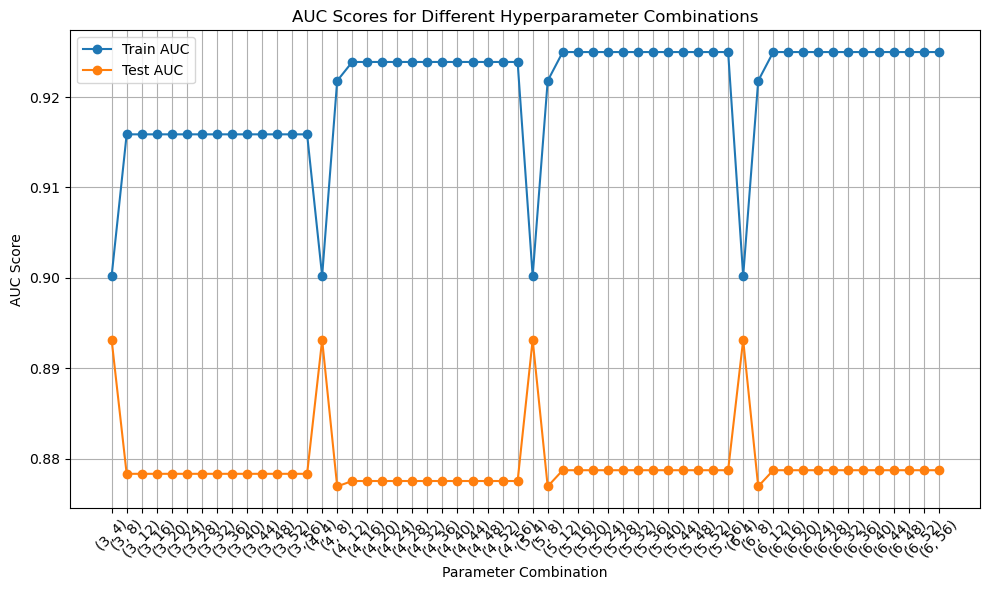

In [12]:
import matplotlib.pyplot as plt

# Extract the AUC values for the training and testing sets
train_auc_values = []
test_auc_values = []
for params, auc_scores in auc_results.items():
    train_auc_values.append(auc_scores[0])
    test_auc_values.append(auc_scores[1])

# Plot the chart
plt.figure(figsize=(10, 6))
plt.plot(range(len(auc_results)), train_auc_values, label='Train AUC', marker='o')
plt.plot(range(len(auc_results)), test_auc_values, label='Test AUC', marker='o')
plt.xlabel('Parameter Combination')
plt.ylabel('AUC Score')
plt.title('AUC Scores for Different Hyperparameter Combinations')
plt.xticks(range(len(auc_results)), auc_results.keys(), rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


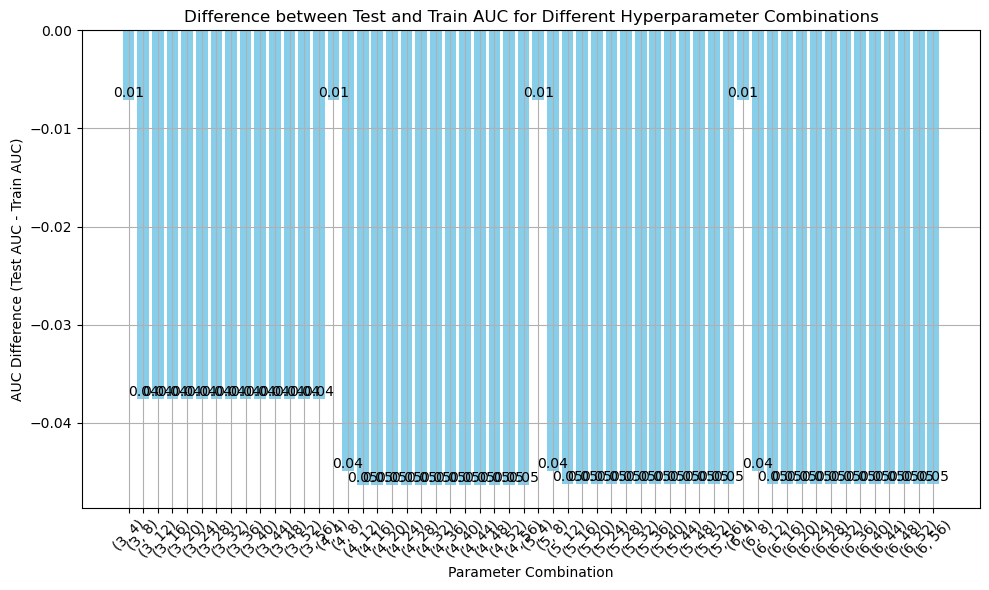

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate AUC differences
auc_diff = np.array(test_auc_values) - np.array(train_auc_values)

# Plot the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(range(len(auc_results)), auc_diff, color='skyblue')

# Add absolute value labels on the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.,
             height,
             '%.2f' % abs(height),
             ha='center', va='bottom')

plt.xlabel('Parameter Combination')
plt.ylabel('AUC Difference (Test AUC - Train AUC)')
plt.title('Difference between Test and Train AUC for Different Hyperparameter Combinations')
plt.xticks(range(len(auc_results)), auc_results.keys(), rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [14]:
# Get the indices of the 15 combinations with the smallest absolute differences
top_15_indices = np.argsort(auc_diff)[:15]

# Print the 15 combinations with the smallest absolute differences and their corresponding AUC differences
print("15 combinations with the smallest absolute differences and their corresponding AUC differences:")
for index in top_15_indices:
    params = list(auc_results.keys())[index]
    diff = auc_diff[index]
    print("Parameter combination:", params, ", AUC difference:", diff)


15 combinations with the smallest absolute differences and their corresponding AUC differences:
Parameter combination: (4, 56) , AUC difference: -0.046377548291022475
Parameter combination: (4, 52) , AUC difference: -0.046377548291022475
Parameter combination: (4, 48) , AUC difference: -0.046377548291022475
Parameter combination: (4, 44) , AUC difference: -0.046377548291022475
Parameter combination: (4, 40) , AUC difference: -0.046377548291022475
Parameter combination: (4, 36) , AUC difference: -0.046377548291022475
Parameter combination: (4, 32) , AUC difference: -0.046377548291022475
Parameter combination: (4, 28) , AUC difference: -0.046377548291022475
Parameter combination: (4, 24) , AUC difference: -0.046377548291022475
Parameter combination: (4, 20) , AUC difference: -0.046377548291022475
Parameter combination: (4, 16) , AUC difference: -0.046377548291022475
Parameter combination: (4, 12) , AUC difference: -0.046377548291022475
Parameter combination: (5, 28) , AUC difference: -0.

In [15]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

# Define the range for 'max_bin' and 'min_data_in_leaf'
max_bin_range = range(5, 155, 10)
min_data_in_leaf_range = range(11, 102, 10)

# Define the parameter grid
param_grid = {
    'learning_rate': [0.006],
    'n_estimators': [50],
    'max_depth': [4],
    'num_leaves': [12]
}

# Create lists to store results
results_train = []
results_test = []

for max_bin in max_bin_range:
    for min_data_in_leaf in min_data_in_leaf_range:
        # Update the parameter grid
        param_grid['max_bin'] = [max_bin]
        param_grid['min_data_in_leaf'] = [min_data_in_leaf]

        # Create LGBM Classifier
        lgb_classifier = lgb.LGBMClassifier(random_state=321, verbose=-1)

        # Perform Grid Search
        grid_search = GridSearchCV(lgb_classifier, param_grid=param_grid, cv=10, scoring='roc_auc', n_jobs=-1)
        grid_search.fit(train_X, train_y)

        # Extract best model
        best_model = grid_search.best_estimator_

        # Predict probabilities
        train_pred_prob = best_model.predict_proba(train_X)[:, 1]
        test_pred_prob = best_model.predict_proba(test_X)[:, 1]

        # Calculate AUC scores
        train_auc = roc_auc_score(train_y, train_pred_prob)
        test_auc = roc_auc_score(test_y, test_pred_prob)

        # Store results
        results_train.append((max_bin, min_data_in_leaf, train_auc))
        results_test.append((max_bin, min_data_in_leaf, test_auc))

# Print the results
print("Parameter combination\tTrain AUC\tTest AUC")
for i in range(len(results_train)):
    print(f"{results_train[i][:2]}\t{results_train[i][2]:.4f}\t{results_test[i][2]:.4f}")


Parameter combination	Train AUC	Test AUC
(5, 11)	0.9087	0.8503
(5, 21)	0.8893	0.8806
(5, 31)	0.8719	0.8719
(5, 41)	0.8444	0.8844
(5, 51)	0.8444	0.8844
(5, 61)	0.8444	0.8844
(5, 71)	0.8444	0.8844
(5, 81)	0.8717	0.9041
(5, 91)	0.8619	0.8974
(5, 101)	0.8596	0.9041
(15, 11)	0.9241	0.8726
(15, 21)	0.9151	0.8789
(15, 31)	0.9127	0.8938
(15, 41)	0.9067	0.8812
(15, 51)	0.8891	0.8729
(15, 61)	0.8821	0.8866
(15, 71)	0.8695	0.8757
(15, 81)	0.8728	0.8727
(15, 91)	0.8728	0.8727
(15, 101)	0.8680	0.8658
(25, 11)	0.9284	0.8737
(25, 21)	0.9186	0.8745
(25, 31)	0.9185	0.8906
(25, 41)	0.9054	0.8696
(25, 51)	0.8960	0.8641
(25, 61)	0.8920	0.8747
(25, 71)	0.8741	0.8754
(25, 81)	0.8743	0.8760
(25, 91)	0.8724	0.8713
(25, 101)	0.8680	0.8658
(35, 11)	0.9355	0.8782
(35, 21)	0.9226	0.8782
(35, 31)	0.9217	0.8860
(35, 41)	0.9135	0.8871
(35, 51)	0.9000	0.8644
(35, 61)	0.8951	0.8745
(35, 71)	0.8768	0.8748
(35, 81)	0.8757	0.8767
(35, 91)	0.8730	0.8727
(35, 101)	0.8900	0.8870
(45, 11)	0.9308	0.8771
(45, 21)	0.9178	0.8769

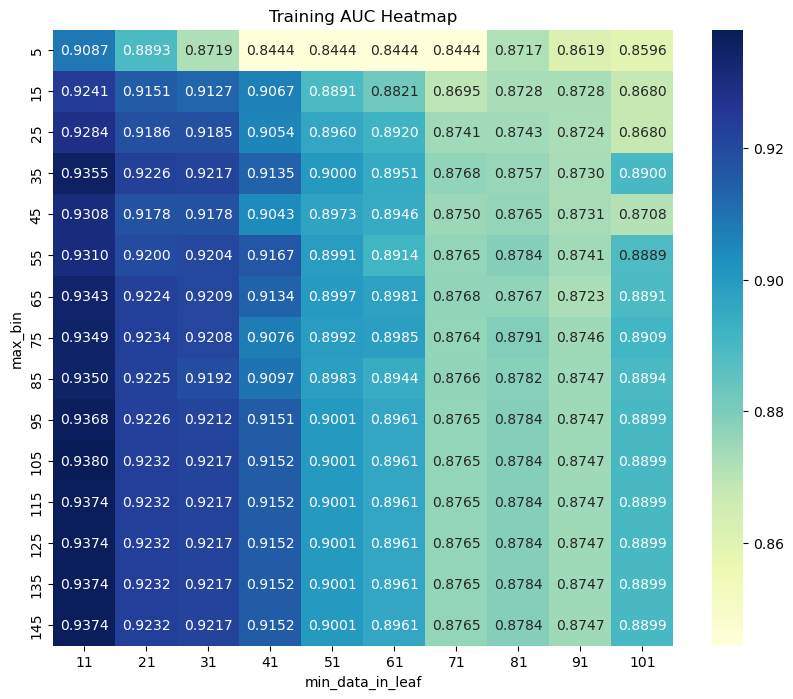

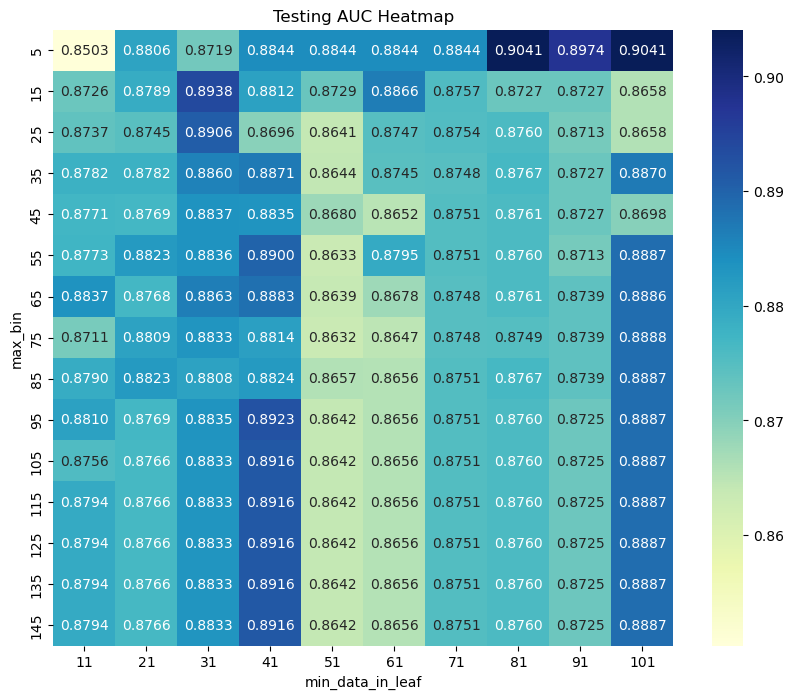

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Convert results to numpy arrays for easier manipulation
results_train_np = np.array(results_train)
results_test_np = np.array(results_test)

# Reshape the results to create matrices
train_auc_matrix = results_train_np[:, 2].reshape(len(max_bin_range), len(min_data_in_leaf_range))
test_auc_matrix = results_test_np[:, 2].reshape(len(max_bin_range), len(min_data_in_leaf_range))

# Create a heatmap for training AUC
plt.figure(figsize=(10, 8))
sns.heatmap(train_auc_matrix, annot=True, fmt=".4f", xticklabels=min_data_in_leaf_range, yticklabels=max_bin_range, cmap="YlGnBu")
plt.title("Training AUC Heatmap")
plt.xlabel("min_data_in_leaf")
plt.ylabel("max_bin")
plt.show()

# Create a heatmap for testing AUC
plt.figure(figsize=(10, 8))
sns.heatmap(test_auc_matrix, annot=True, fmt=".4f", xticklabels=min_data_in_leaf_range, yticklabels=max_bin_range, cmap="YlGnBu")
plt.title("Testing AUC Heatmap")
plt.xlabel("min_data_in_leaf")
plt.ylabel("max_bin")
plt.show()



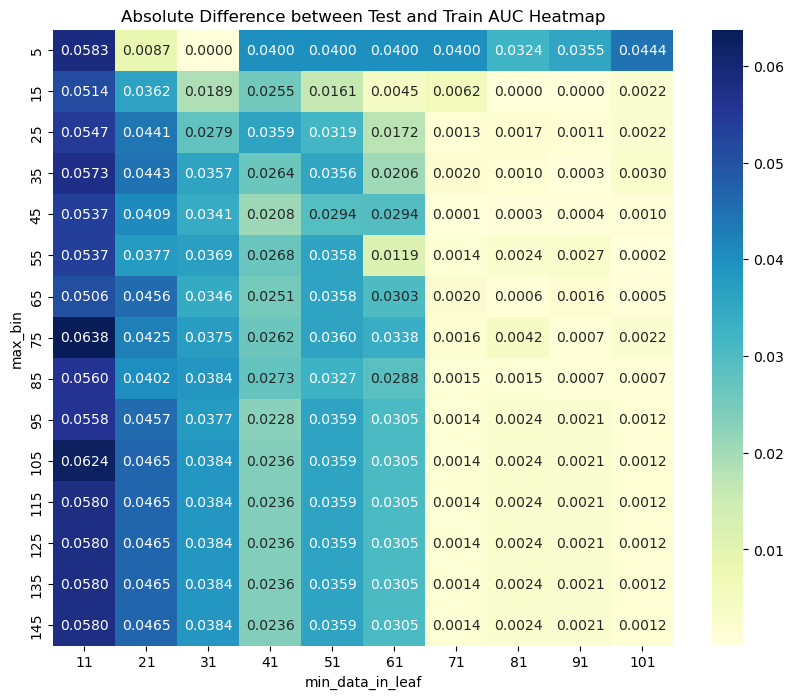

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Convert results to numpy arrays for easier manipulation
results_train_np = np.array(results_train)
results_test_np = np.array(results_test)

# Reshape the results to create matrices
train_auc_matrix = results_train_np[:, 2].reshape(len(max_bin_range), len(min_data_in_leaf_range))
test_auc_matrix = results_test_np[:, 2].reshape(len(max_bin_range), len(min_data_in_leaf_range))

# Calculate the absolute difference between test and train AUC
auc_diff_matrix = np.abs(test_auc_matrix - train_auc_matrix)

# Create a heatmap for the absolute difference between test and train AUC
plt.figure(figsize=(10, 8))
sns.heatmap(auc_diff_matrix, annot=True, fmt=".4f", xticklabels=min_data_in_leaf_range, yticklabels=max_bin_range, cmap="YlGnBu")
plt.title("Absolute Difference between Test and Train AUC Heatmap")
plt.xlabel("min_data_in_leaf")
plt.ylabel("max_bin")
plt.show()

In [18]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

# Define the range for 'max_bin' and 'min_data_in_leaf'
max_bin_range = range(4,35,2)
min_data_in_leaf_range = range(40,85, 2)

# Define the parameter grid
param_grid = {
    'learning_rate': [0.006],
    'n_estimators': [50],
    'max_depth': [4],
    'num_leaves': [12]
}

# Create lists to store results
results_train = []
results_test = []

for max_bin in max_bin_range:
    for min_data_in_leaf in min_data_in_leaf_range:
        # Update the parameter grid
        param_grid['max_bin'] = [max_bin]
        param_grid['min_data_in_leaf'] = [min_data_in_leaf]

        # Create LGBM Classifier
        lgb_classifier = lgb.LGBMClassifier(random_state=321, verbose=-1)

        # Perform Grid Search
        grid_search = GridSearchCV(lgb_classifier, param_grid=param_grid, cv=10, scoring='roc_auc', n_jobs=-1)
        grid_search.fit(train_X, train_y)

        # Extract best model
        best_model = grid_search.best_estimator_

        # Predict probabilities
        train_pred_prob = best_model.predict_proba(train_X)[:, 1]
        test_pred_prob = best_model.predict_proba(test_X)[:, 1]

        # Calculate AUC scores
        train_auc = roc_auc_score(train_y, train_pred_prob)
        test_auc = roc_auc_score(test_y, test_pred_prob)

        # Store results
        results_train.append((max_bin, min_data_in_leaf, train_auc))
        results_test.append((max_bin, min_data_in_leaf, test_auc))

# Print the results
print("Parameter combination\tTrain AUC\tTest AUC")
for i in range(len(results_train)):
    print(f"{results_train[i][:2]}\t{results_train[i][2]:.4f}\t{results_test[i][2]:.4f}")

Parameter combination	Train AUC	Test AUC
(4, 40)	0.8537	0.8690
(4, 42)	0.8457	0.8713
(4, 44)	0.8457	0.8713
(4, 46)	0.8457	0.8713
(4, 48)	0.8457	0.8713
(4, 50)	0.8457	0.8713
(4, 52)	0.8457	0.8713
(4, 54)	0.8457	0.8713
(4, 56)	0.8457	0.8713
(4, 58)	0.8457	0.8713
(4, 60)	0.8457	0.8713
(4, 62)	0.8457	0.8713
(4, 64)	0.8457	0.8713
(4, 66)	0.8457	0.8713
(4, 68)	0.8457	0.8713
(4, 70)	0.8457	0.8713
(4, 72)	0.8343	0.8760
(4, 74)	0.8343	0.8760
(4, 76)	0.8343	0.8760
(4, 78)	0.8343	0.8760
(4, 80)	0.8529	0.8961
(4, 82)	0.8495	0.8894
(4, 84)	0.8413	0.8896
(6, 40)	0.8956	0.8792
(6, 42)	0.8927	0.8651
(6, 44)	0.8842	0.8776
(6, 46)	0.8842	0.8776
(6, 48)	0.8805	0.8732
(6, 50)	0.8830	0.8711
(6, 52)	0.8830	0.8711
(6, 54)	0.8830	0.8711
(6, 56)	0.8830	0.8711
(6, 58)	0.8830	0.8711
(6, 60)	0.8687	0.8609
(6, 62)	0.8615	0.8628
(6, 64)	0.8615	0.8628
(6, 66)	0.8615	0.8628
(6, 68)	0.8615	0.8628
(6, 70)	0.8615	0.8628
(6, 72)	0.8615	0.8628
(6, 74)	0.8615	0.8628
(6, 76)	0.8615	0.8628
(6, 78)	0.8615	0.8628
(6, 80)	0.861

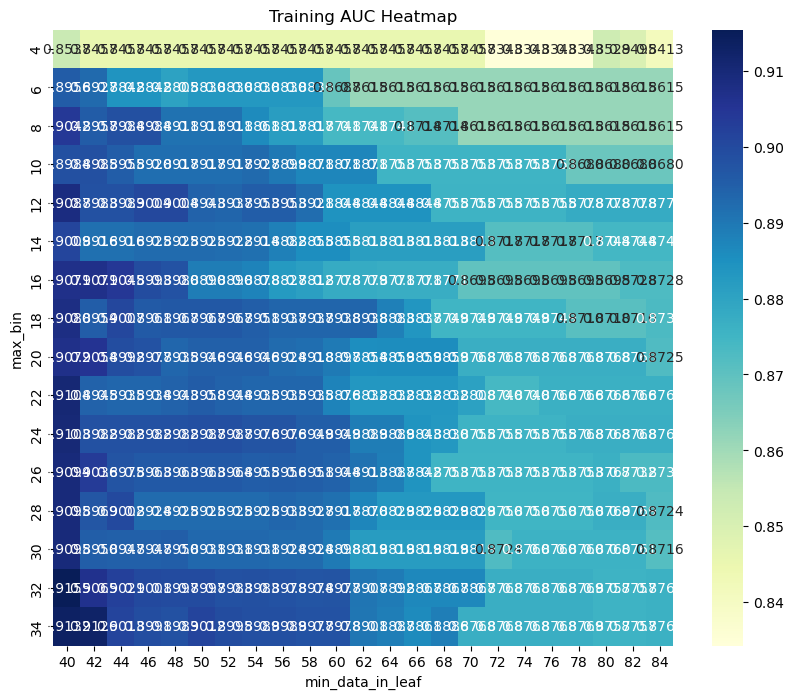

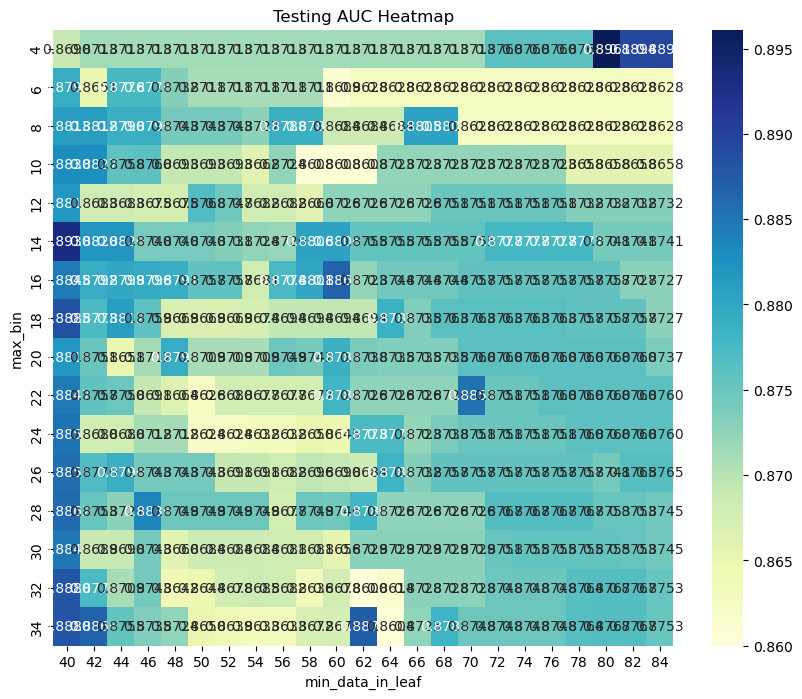

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Convert results to numpy arrays for easier manipulation
results_train_np = np.array(results_train)
results_test_np = np.array(results_test)

# Reshape the results to create matrices
train_auc_matrix = results_train_np[:, 2].reshape(len(max_bin_range), len(min_data_in_leaf_range))
test_auc_matrix = results_test_np[:, 2].reshape(len(max_bin_range), len(min_data_in_leaf_range))

# Create a heatmap for training AUC
plt.figure(figsize=(10, 8))
sns.heatmap(train_auc_matrix, annot=True, fmt=".4f", xticklabels=min_data_in_leaf_range, yticklabels=max_bin_range, cmap="YlGnBu")
plt.title("Training AUC Heatmap")
plt.xlabel("min_data_in_leaf")
plt.ylabel("max_bin")
plt.show()

# Create a heatmap for testing AUC
plt.figure(figsize=(10, 8))
sns.heatmap(test_auc_matrix, annot=True, fmt=".4f", xticklabels=min_data_in_leaf_range, yticklabels=max_bin_range, cmap="YlGnBu")
plt.title("Testing AUC Heatmap")
plt.xlabel("min_data_in_leaf")
plt.ylabel("max_bin")
plt.show()

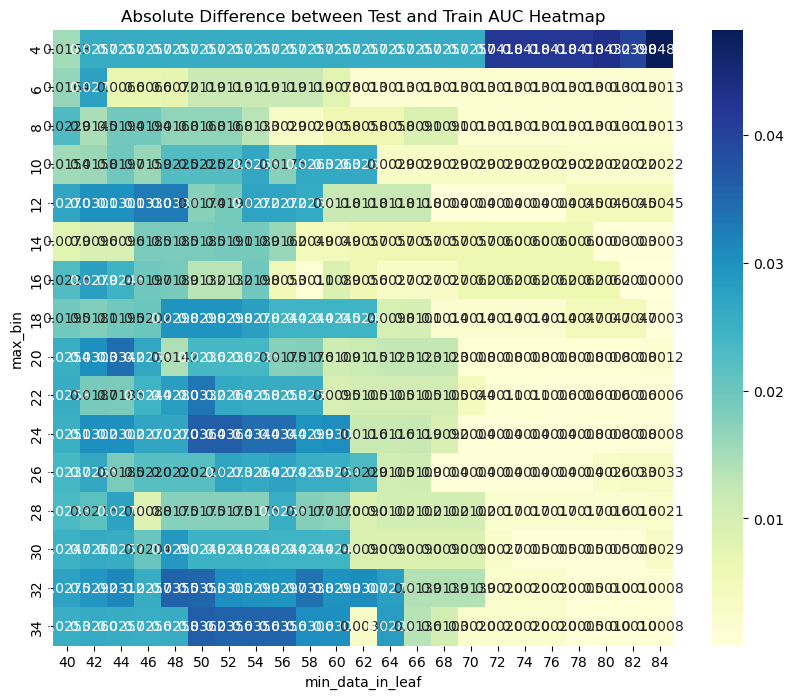

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Convert results to numpy arrays for easier manipulation
results_train_np = np.array(results_train)
results_test_np = np.array(results_test)

# Reshape the results to create matrices
train_auc_matrix = results_train_np[:, 2].reshape(len(max_bin_range), len(min_data_in_leaf_range))
test_auc_matrix = results_test_np[:, 2].reshape(len(max_bin_range), len(min_data_in_leaf_range))

# Calculate the absolute difference between test and train AUC
auc_diff_matrix = np.abs(test_auc_matrix - train_auc_matrix)

# Create a heatmap for the absolute difference between test and train AUC
plt.figure(figsize=(10, 8))
sns.heatmap(auc_diff_matrix, annot=True, fmt=".4f", xticklabels=min_data_in_leaf_range, yticklabels=max_bin_range, cmap="YlGnBu")
plt.title("Absolute Difference between Test and Train AUC Heatmap")
plt.xlabel("min_data_in_leaf")
plt.ylabel("max_bin")
plt.show()

In [21]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

# Define the range for 'max_bin' and 'min_data_in_leaf'
max_bin_range = range(4,26,2)
min_data_in_leaf_range = range(53,75, 3)

# Define the parameter grid
param_grid = {
    'learning_rate': [0.006],
    'n_estimators': [50],
    'max_depth': [4],
    'num_leaves': [12]
}

# Create lists to store results
results_train = []
results_test = []

for max_bin in max_bin_range:
    for min_data_in_leaf in min_data_in_leaf_range:
        # Update the parameter grid
        param_grid['max_bin'] = [max_bin]
        param_grid['min_data_in_leaf'] = [min_data_in_leaf]

        # Create LGBM Classifier
        lgb_classifier = lgb.LGBMClassifier(random_state=321, verbose=-1)

        # Perform Grid Search
        grid_search = GridSearchCV(lgb_classifier, param_grid=param_grid, cv=10, scoring='roc_auc', n_jobs=-1)
        grid_search.fit(train_X, train_y)

        # Extract best model
        best_model = grid_search.best_estimator_

        # Predict probabilities
        train_pred_prob = best_model.predict_proba(train_X)[:, 1]
        test_pred_prob = best_model.predict_proba(test_X)[:, 1]

        # Calculate AUC scores
        train_auc = roc_auc_score(train_y, train_pred_prob)
        test_auc = roc_auc_score(test_y, test_pred_prob)

        # Store results
        results_train.append((max_bin, min_data_in_leaf, train_auc))
        results_test.append((max_bin, min_data_in_leaf, test_auc))

# Print the results
print("Parameter combination\tTrain AUC\tTest AUC")
for i in range(len(results_train)):
    print(f"{results_train[i][:2]}\t{results_train[i][2]:.4f}\t{results_test[i][2]:.4f}")

Parameter combination	Train AUC	Test AUC
(4, 53)	0.8457	0.8713
(4, 56)	0.8457	0.8713
(4, 59)	0.8457	0.8713
(4, 62)	0.8457	0.8713
(4, 65)	0.8457	0.8713
(4, 68)	0.8457	0.8713
(4, 71)	0.8457	0.8713
(4, 74)	0.8343	0.8760
(6, 53)	0.8830	0.8711
(6, 56)	0.8830	0.8711
(6, 59)	0.8830	0.8711
(6, 62)	0.8615	0.8628
(6, 65)	0.8615	0.8628
(6, 68)	0.8615	0.8628
(6, 71)	0.8615	0.8628
(6, 74)	0.8615	0.8628
(8, 53)	0.8911	0.8743
(8, 56)	0.8817	0.8788
(8, 59)	0.8741	0.8684
(8, 62)	0.8741	0.8684
(8, 65)	0.8741	0.8684
(8, 68)	0.8714	0.8805
(8, 71)	0.8615	0.8628
(8, 74)	0.8615	0.8628
(10, 53)	0.8917	0.8693
(10, 56)	0.8899	0.8724
(10, 59)	0.8871	0.8608
(10, 62)	0.8871	0.8608
(10, 65)	0.8753	0.8723
(10, 68)	0.8753	0.8723
(10, 71)	0.8753	0.8723
(10, 74)	0.8753	0.8723
(12, 53)	0.8953	0.8682
(12, 56)	0.8953	0.8682
(12, 59)	0.8844	0.8726
(12, 62)	0.8844	0.8726
(12, 65)	0.8844	0.8726
(12, 68)	0.8755	0.8751
(12, 71)	0.8755	0.8751
(12, 74)	0.8755	0.8751
(14, 53)	0.8922	0.8731
(14, 56)	0.8882	0.8720
(14, 59)	0.8855	0

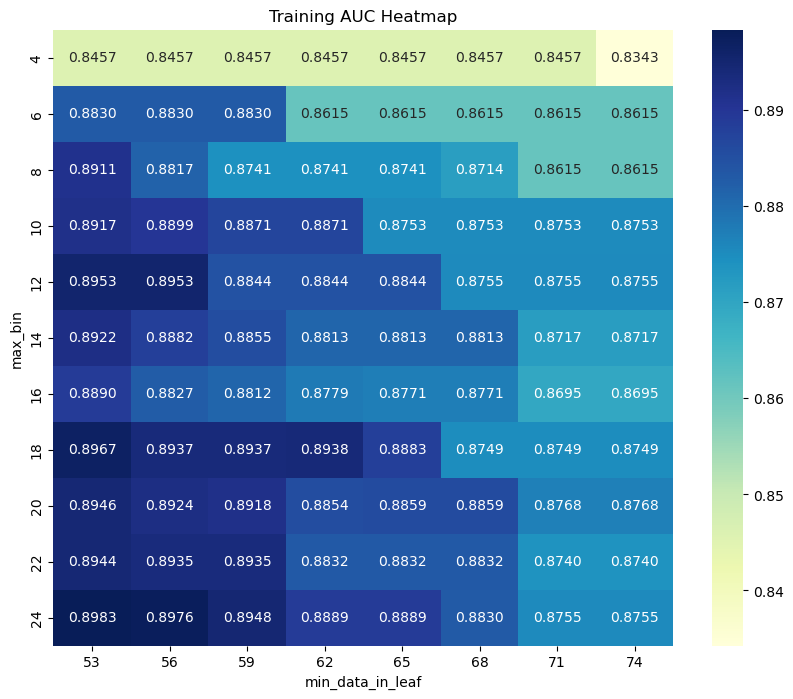

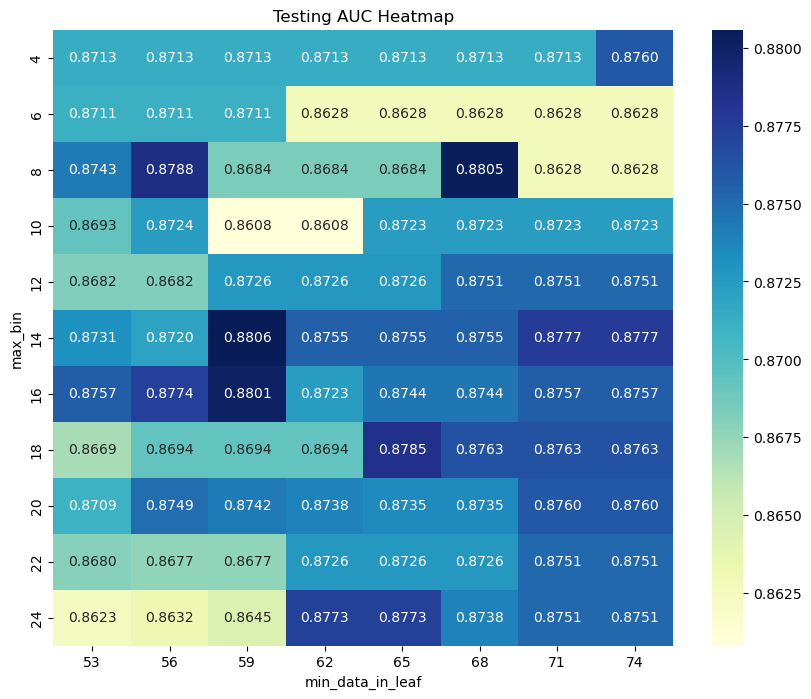

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Convert results to numpy arrays for easier manipulation
results_train_np = np.array(results_train)
results_test_np = np.array(results_test)

# Reshape the results to create matrices
train_auc_matrix = results_train_np[:, 2].reshape(len(max_bin_range), len(min_data_in_leaf_range))
test_auc_matrix = results_test_np[:, 2].reshape(len(max_bin_range), len(min_data_in_leaf_range))

# Create a heatmap for training AUC
plt.figure(figsize=(10, 8))
sns.heatmap(train_auc_matrix, annot=True, fmt=".4f", xticklabels=min_data_in_leaf_range, yticklabels=max_bin_range, cmap="YlGnBu")
plt.title("Training AUC Heatmap")
plt.xlabel("min_data_in_leaf")
plt.ylabel("max_bin")
plt.show()

# Create a heatmap for testing AUC
plt.figure(figsize=(10, 8))
sns.heatmap(test_auc_matrix, annot=True, fmt=".4f", xticklabels=min_data_in_leaf_range, yticklabels=max_bin_range, cmap="YlGnBu")
plt.title("Testing AUC Heatmap")
plt.xlabel("min_data_in_leaf")
plt.ylabel("max_bin")
plt.show()


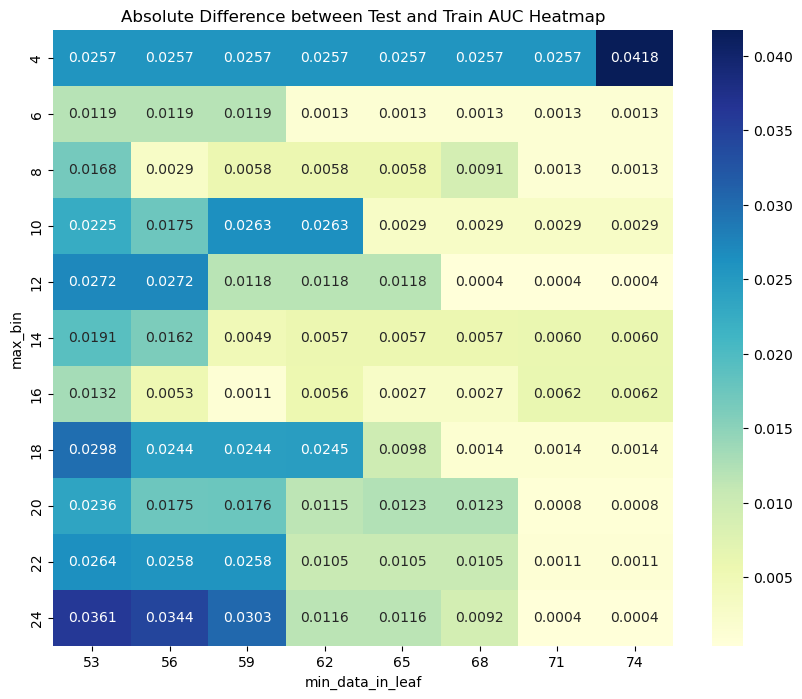

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Convert results to numpy arrays for easier manipulation
results_train_np = np.array(results_train)
results_test_np = np.array(results_test)

# Reshape the results to create matrices
train_auc_matrix = results_train_np[:, 2].reshape(len(max_bin_range), len(min_data_in_leaf_range))
test_auc_matrix = results_test_np[:, 2].reshape(len(max_bin_range), len(min_data_in_leaf_range))

# Calculate the absolute difference between test and train AUC
auc_diff_matrix = np.abs(test_auc_matrix - train_auc_matrix)

# Create a heatmap for the absolute difference between test and train AUC
plt.figure(figsize=(10, 8))
sns.heatmap(auc_diff_matrix, annot=True, fmt=".4f", xticklabels=min_data_in_leaf_range, yticklabels=max_bin_range, cmap="YlGnBu")
plt.title("Absolute Difference between Test and Train AUC Heatmap")
plt.xlabel("min_data_in_leaf")
plt.ylabel("max_bin")
plt.show()

In [24]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

# Define the range for 'max_bin' and 'min_data_in_leaf'
max_bin_range = range(4,14,1)
min_data_in_leaf_range = range(23,65, 3)

# Define the parameter grid
param_grid = {
    'learning_rate': [0.006],
    'n_estimators': [150],
    'max_depth': [5],
    'num_leaves': [26]
}

# Create lists to store results
results_train = []
results_test = []

for max_bin in max_bin_range:
    for min_data_in_leaf in min_data_in_leaf_range:
        # Update the parameter grid
        param_grid['max_bin'] = [max_bin]
        param_grid['min_data_in_leaf'] = [min_data_in_leaf]

        # Create LGBM Classifier
        lgb_classifier = lgb.LGBMClassifier(random_state=321, verbose=-1)

        # Perform Grid Search
        grid_search = GridSearchCV(lgb_classifier, param_grid=param_grid, cv=10, scoring='roc_auc', n_jobs=-1)
        grid_search.fit(train_X, train_y)

        # Extract best model
        best_model = grid_search.best_estimator_

        # Predict probabilities
        train_pred_prob = best_model.predict_proba(train_X)[:, 1]
        test_pred_prob = best_model.predict_proba(test_X)[:, 1]

        # Calculate AUC scores
        train_auc = roc_auc_score(train_y, train_pred_prob)
        test_auc = roc_auc_score(test_y, test_pred_prob)

        # Store results
        results_train.append((max_bin, min_data_in_leaf, train_auc))
        results_test.append((max_bin, min_data_in_leaf, test_auc))

# Print the results
print("Parameter combination\tTrain AUC\tTest AUC")
for i in range(len(results_train)):
    print(f"{results_train[i][:2]}\t{results_train[i][2]:.4f}\t{results_test[i][2]:.4f}")

Parameter combination	Train AUC	Test AUC
(4, 23)	0.8720	0.8693
(4, 26)	0.8724	0.8685
(4, 29)	0.8724	0.8685
(4, 32)	0.8739	0.8756
(4, 35)	0.8720	0.8823
(4, 38)	0.8725	0.8793
(4, 41)	0.8721	0.8777
(4, 44)	0.8712	0.8771
(4, 47)	0.8712	0.8771
(4, 50)	0.8701	0.8812
(4, 53)	0.8637	0.9002
(4, 56)	0.8703	0.8930
(4, 59)	0.8637	0.9000
(4, 62)	0.8674	0.8948
(5, 23)	0.8984	0.8742
(5, 26)	0.8951	0.8866
(5, 29)	0.8941	0.8862
(5, 32)	0.8939	0.8798
(5, 35)	0.8928	0.8856
(5, 38)	0.8863	0.8941
(5, 41)	0.8863	0.8956
(5, 44)	0.8865	0.8941
(5, 47)	0.8865	0.8937
(5, 50)	0.8859	0.8953
(5, 53)	0.8826	0.8998
(5, 56)	0.8778	0.8997
(5, 59)	0.8778	0.8997
(5, 62)	0.8802	0.8980
(6, 23)	0.9086	0.8824
(6, 26)	0.9109	0.8792
(6, 29)	0.9081	0.8799
(6, 32)	0.9069	0.8747
(6, 35)	0.9054	0.8707
(6, 38)	0.9030	0.8938
(6, 41)	0.8999	0.8842
(6, 44)	0.8960	0.8833
(6, 47)	0.8924	0.8803
(6, 50)	0.8958	0.8796
(6, 53)	0.8887	0.8740
(6, 56)	0.8890	0.8760
(6, 59)	0.8890	0.8760
(6, 62)	0.8890	0.8836
(7, 23)	0.9080	0.8789
(7, 26)	0.908

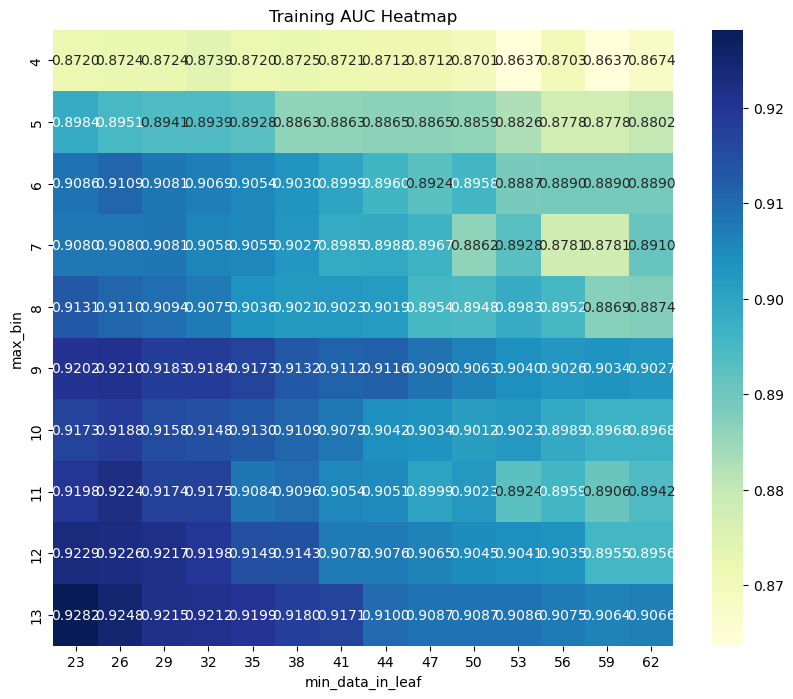

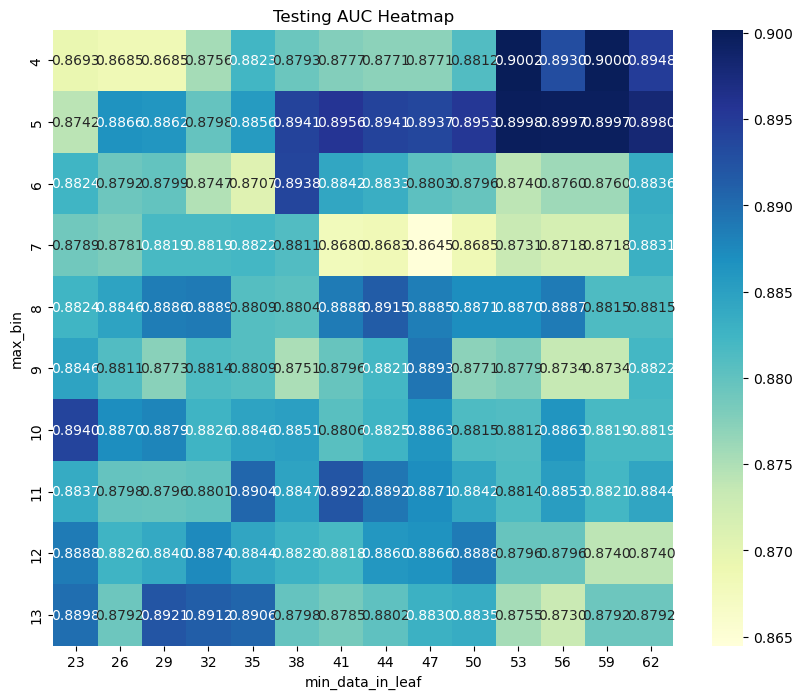

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Convert results to numpy arrays for easier manipulation
results_train_np = np.array(results_train)
results_test_np = np.array(results_test)

# Reshape the results to create matrices
train_auc_matrix = results_train_np[:, 2].reshape(len(max_bin_range), len(min_data_in_leaf_range))
test_auc_matrix = results_test_np[:, 2].reshape(len(max_bin_range), len(min_data_in_leaf_range))

# Create a heatmap for training AUC
plt.figure(figsize=(10, 8))
sns.heatmap(train_auc_matrix, annot=True, fmt=".4f", xticklabels=min_data_in_leaf_range, yticklabels=max_bin_range, cmap="YlGnBu")
plt.title("Training AUC Heatmap")
plt.xlabel("min_data_in_leaf")
plt.ylabel("max_bin")
plt.show()

# Create a heatmap for testing AUC
plt.figure(figsize=(10, 8))
sns.heatmap(test_auc_matrix, annot=True, fmt=".4f", xticklabels=min_data_in_leaf_range, yticklabels=max_bin_range, cmap="YlGnBu")
plt.title("Testing AUC Heatmap")
plt.xlabel("min_data_in_leaf")
plt.ylabel("max_bin")
plt.show()


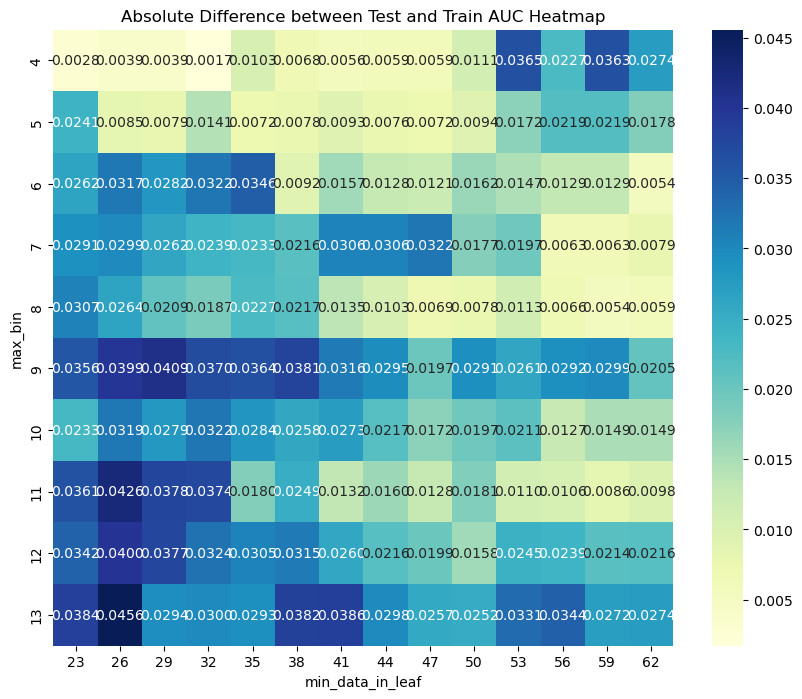

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Convert results to numpy arrays for easier manipulation
results_train_np = np.array(results_train)
results_test_np = np.array(results_test)

# Reshape the results to create matrices
train_auc_matrix = results_train_np[:, 2].reshape(len(max_bin_range), len(min_data_in_leaf_range))
test_auc_matrix = results_test_np[:, 2].reshape(len(max_bin_range), len(min_data_in_leaf_range))

# Calculate the absolute difference between test and train AUC
auc_diff_matrix = np.abs(test_auc_matrix - train_auc_matrix)

# Create a heatmap for the absolute difference between test and train AUC
plt.figure(figsize=(10, 8))
sns.heatmap(auc_diff_matrix, annot=True, fmt=".4f", xticklabels=min_data_in_leaf_range, yticklabels=max_bin_range, cmap="YlGnBu")
plt.title("Absolute Difference between Test and Train AUC Heatmap")
plt.xlabel("min_data_in_leaf")
plt.ylabel("max_bin")
plt.show()

In [27]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

# Define the range for 'feature_fraction', 'bagging_fraction', and 'bagging_freq'
feature_fraction_range = [0.6, 0.7, 0.8, 0.9, 1.0]
bagging_fraction_range = [0.6, 0.7, 0.8, 0.9, 1.0]
bagging_freq_range = range(0, 40,5)

# Define the parameter grid
param_grid = {
    'learning_rate': [0.006],
    'n_estimators': [50],
    'max_depth': [4],
    'num_leaves': [12],
     'max_bin':[14],
     'min_data_in_leaf':[59]
}

# Create lists to store results
results_train = []
results_test = []

for feature_fraction in feature_fraction_range:
    for bagging_fraction in bagging_fraction_range:
        for bagging_freq in bagging_freq_range:
            # Update the parameter grid
            param_grid['feature_fraction'] = [feature_fraction]
            param_grid['bagging_fraction'] = [bagging_fraction]
            param_grid['bagging_freq'] = [bagging_freq]

            # Create LGBM Classifier
            lgb_classifier = lgb.LGBMClassifier(random_state=321, verbose=-1)

            # Perform Grid Search
            grid_search = GridSearchCV(lgb_classifier, param_grid=param_grid, cv=10, scoring='roc_auc', n_jobs=-1)
            grid_search.fit(train_X, train_y)

            # Extract best model
            best_model = grid_search.best_estimator_

            # Predict probabilities
            train_pred_prob = best_model.predict_proba(train_X)[:, 1]
            test_pred_prob = best_model.predict_proba(test_X)[:, 1]

            # Calculate AUC scores
            train_auc = roc_auc_score(train_y, train_pred_prob)
            test_auc = roc_auc_score(test_y, test_pred_prob)

            # Store results
            results_train.append((feature_fraction, bagging_fraction, bagging_freq, train_auc))
            results_test.append((feature_fraction, bagging_fraction, bagging_freq, test_auc))

# Print the results



In [28]:
print("Parameter combination\tTrain AUC\tTest AUC")
for i in range(len(results_train)):
    print(f"{results_train[i][:3]}\t{results_train[i][3]:.4f}\t{results_test[i][3]:.4f}")

Parameter combination	Train AUC	Test AUC
(0.6, 0.6, 0)	0.8995	0.8732
(0.6, 0.6, 5)	0.8846	0.8748
(0.6, 0.6, 10)	0.8839	0.8781
(0.6, 0.6, 15)	0.8839	0.8781
(0.6, 0.6, 20)	0.8743	0.8755
(0.6, 0.6, 25)	0.7938	0.8144
(0.6, 0.6, 30)	0.7938	0.8144
(0.6, 0.6, 35)	0.8743	0.8755
(0.6, 0.7, 0)	0.8995	0.8732
(0.6, 0.7, 5)	0.8860	0.8740
(0.6, 0.7, 10)	0.8849	0.8704
(0.6, 0.7, 15)	0.8862	0.8710
(0.6, 0.7, 20)	0.8872	0.8736
(0.6, 0.7, 25)	0.8742	0.8564
(0.6, 0.7, 30)	0.8744	0.8526
(0.6, 0.7, 35)	0.8751	0.8572
(0.6, 0.8, 0)	0.8995	0.8732
(0.6, 0.8, 5)	0.8909	0.8778
(0.6, 0.8, 10)	0.8762	0.8602
(0.6, 0.8, 15)	0.8612	0.8401
(0.6, 0.8, 20)	0.8624	0.8387
(0.6, 0.8, 25)	0.8739	0.8594
(0.6, 0.8, 30)	0.8739	0.8594
(0.6, 0.8, 35)	0.8744	0.8584
(0.6, 0.9, 0)	0.8995	0.8732
(0.6, 0.9, 5)	0.8942	0.8820
(0.6, 0.9, 10)	0.8873	0.8740
(0.6, 0.9, 15)	0.8881	0.8740
(0.6, 0.9, 20)	0.8858	0.8756
(0.6, 0.9, 25)	0.8859	0.8756
(0.6, 0.9, 30)	0.8898	0.8742
(0.6, 0.9, 35)	0.8898	0.8742
(0.6, 1.0, 0)	0.8995	0.8732
(0.6, 1.0, 

In [29]:
# Sort results based on test AUC in descending order
sorted_results_test = sorted(results_test, key=lambda x: x[3], reverse=True)

# Print the top 10 combinations with the highest test AUC
print("Top 10 combinations with the highest test AUC:")
for i, result in enumerate(sorted_results_test[:10], 1):
    print(f"Rank {i}: Feature Fraction={result[0]}, Bagging Fraction={result[1]}, Bagging Frequency={result[2]}, Test AUC={result[3]}")


Top 10 combinations with the highest test AUC:
Rank 1: Feature Fraction=0.9, Bagging Fraction=0.6, Bagging Frequency=10, Test AUC=0.8885572139303481
Rank 2: Feature Fraction=1.0, Bagging Fraction=0.6, Bagging Frequency=10, Test AUC=0.8885572139303481
Rank 3: Feature Fraction=0.9, Bagging Fraction=0.8, Bagging Frequency=5, Test AUC=0.8833830845771145
Rank 4: Feature Fraction=1.0, Bagging Fraction=0.8, Bagging Frequency=5, Test AUC=0.8833830845771145
Rank 5: Feature Fraction=0.9, Bagging Fraction=0.6, Bagging Frequency=15, Test AUC=0.8823880597014926
Rank 6: Feature Fraction=1.0, Bagging Fraction=0.6, Bagging Frequency=15, Test AUC=0.8823880597014926
Rank 7: Feature Fraction=0.6, Bagging Fraction=0.9, Bagging Frequency=5, Test AUC=0.8819900497512437
Rank 8: Feature Fraction=0.7, Bagging Fraction=0.9, Bagging Frequency=5, Test AUC=0.8819900497512437
Rank 9: Feature Fraction=0.8, Bagging Fraction=0.9, Bagging Frequency=5, Test AUC=0.8819900497512437
Rank 10: Feature Fraction=0.9, Bagging F

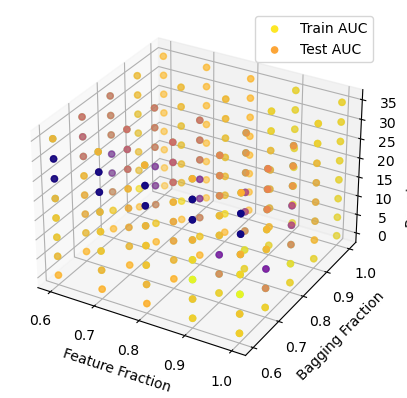

In [30]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Extract x, y values for plotting
x_values = [result[0] for result in results_train]
y_values = [result[1] for result in results_train]
z_values = [result[2] for result in results_train]
train_auc_values = [result[3] for result in results_train]
test_auc_values = [result[3] for result in results_test]

# Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_values, y_values, z_values, c=train_auc_values, cmap='viridis', label='Train AUC')
ax.scatter(x_values, y_values, z_values, c=test_auc_values, cmap='plasma', label='Test AUC')
ax.set_xlabel('Feature Fraction')
ax.set_ylabel('Bagging Fraction')
ax.set_zlabel('Bagging Frequency')
ax.legend()
plt.show()



In [31]:
# Define the parameter grid
param_grid = {
    'learning_rate': [0.006],
    'n_estimators': [50],
    'max_depth': [4],
    'num_leaves': [12],
     'max_bin':[14],
     'min_data_in_leaf':[59],
    'feature_fraction': [0.9],
    'bagging_fraction': [0.6],
    'bagging_freq': [10]
}


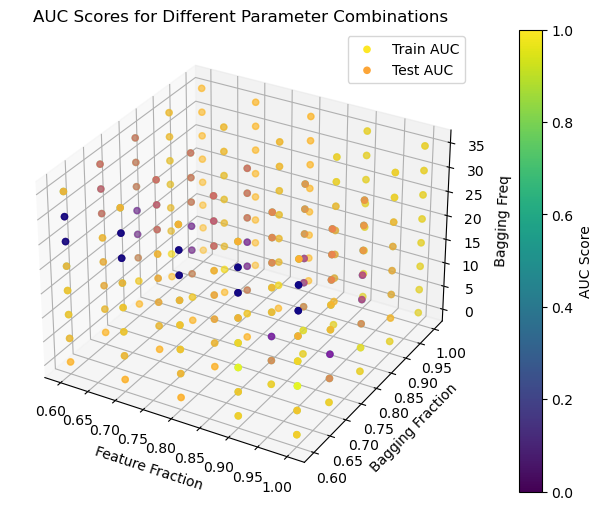

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Convert results to NumPy arrays for plotting
results_train = np.array(results_train)
results_test = np.array(results_test)

# Extract parameter combinations and AUC values
param_combinations_train = results_train[:, :3]
train_auc_values = results_train[:, 3]

param_combinations_test = results_test[:, :3]
test_auc_values = results_test[:, 3]

# Create a new 3D plot
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot train set AUC values
ax.scatter(param_combinations_train[:, 0], param_combinations_train[:, 1], param_combinations_train[:, 2], c=train_auc_values, cmap='viridis', label='Train AUC')

# Plot test set AUC values
ax.scatter(param_combinations_test[:, 0], param_combinations_test[:, 1], param_combinations_test[:, 2], c=test_auc_values, cmap='plasma', label='Test AUC')

# Add axis labels
ax.set_xlabel('Feature Fraction')
ax.set_ylabel('Bagging Fraction')
ax.set_zlabel('Bagging Freq')
ax.set_title('AUC Scores for Different Parameter Combinations')

# Add color bar
cbar = plt.colorbar(ax.scatter([], [], [], c=[], cmap='viridis'))
cbar.ax.set_ylabel('AUC Score')

# Add legend
ax.legend()

# Show plot
plt.show()


In [33]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

# Create LightGBM classifier with the random_state parameter
best_LGBM = lgb.LGBMClassifier(random_state=321, verbose=-1)

# Define the parameter grid
param_grid = {
    'learning_rate': [0.006],
    'n_estimators': [50],
    'max_depth': [4],
    'num_leaves': [12],
    'max_bin': [14],
    'min_data_in_leaf': [59],
    'feature_fraction': [0.9],
    'bagging_fraction': [0.6],
    'bagging_freq': [10]
}

# Use grid search to find the best hyperparameter combination
grid_search = GridSearchCV(best_LGBM, param_grid=param_grid, cv=10, scoring='accuracy', n_jobs=-1)
grid_search.fit(train_X, train_y)

# Output the best parameters and corresponding performance
print("Best parameter combination:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)
best_params_LGBM = grid_search.best_params_



Best parameter combination: {'bagging_fraction': 0.6, 'bagging_freq': 10, 'feature_fraction': 0.9, 'learning_rate': 0.006, 'max_bin': 14, 'max_depth': 4, 'min_data_in_leaf': 59, 'n_estimators': 50, 'num_leaves': 12}
Best score: 0.7806595365418896


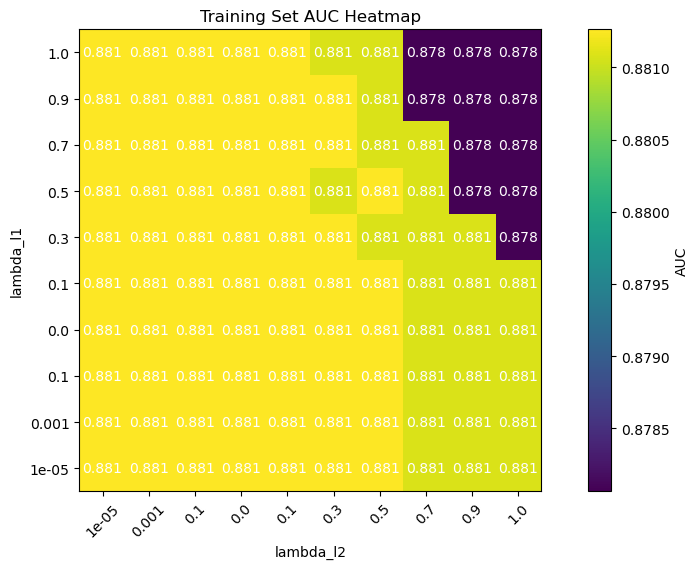

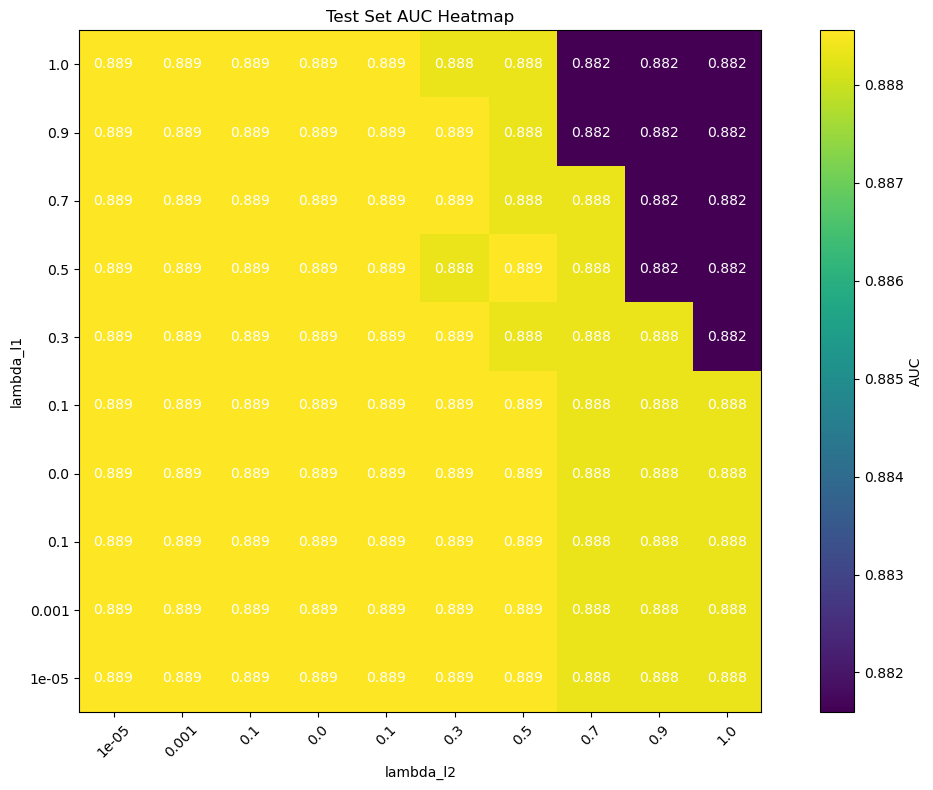

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.metrics import roc_auc_score

# Define the parameter grid
lambda_l1_values = [1e-5, 1e-3, 1e-1, 0.0, 0.1, 0.3, 0.5, 0.7, 0.9, 1.0]
lambda_l2_values = [1e-5, 1e-3, 1e-1, 0.0, 0.1, 0.3, 0.5, 0.7, 0.9, 1.0]

# Create an empty matrix to store AUC values
auc_matrix = np.zeros((len(lambda_l1_values), len(lambda_l2_values)))

# Define a function to calculate AUC for training and testing sets
def calculate_auc(train_X, train_y, test_X, test_y, lambda_l1, lambda_l2):
    params = {
        'lambda_l1': lambda_l1,
        'lambda_l2': lambda_l2,
        'learning_rate': 0.006,
        'n_estimators': 50,
        'max_depth': 4,
        'num_leaves': 12,
        'max_bin': 14,
        'min_data_in_leaf': 59,
        'feature_fraction': 0.9,
        'bagging_fraction': 0.6,
        'bagging_freq': 10,
        'random_state': 321,
        'verbose': -1
    }
    lgbm = lgb.LGBMClassifier(**params)
    lgbm.fit(train_X, train_y)
    train_pred = lgbm.predict_proba(train_X)[:, 1]
    test_pred = lgbm.predict_proba(test_X)[:, 1]
    train_auc = roc_auc_score(train_y, train_pred)
    test_auc = roc_auc_score(test_y, test_pred)
    return train_auc, test_auc

# Create empty matrices to store AUC values for training and testing sets
train_auc_matrix = np.zeros((len(lambda_l1_values), len(lambda_l2_values)))
test_auc_matrix = np.zeros((len(lambda_l1_values), len(lambda_l2_values)))

# Iterate over lambda_l1 and lambda_l2 and calculate AUC for training and testing sets
for i, lambda_l1 in enumerate(lambda_l1_values):
    for j, lambda_l2 in enumerate(lambda_l2_values):
        train_auc, test_auc = calculate_auc(train_X, train_y, test_X, test_y, lambda_l1, lambda_l2)
        train_auc_matrix[i, j] = train_auc
        test_auc_matrix[i, j] = test_auc

# Plot the heatmap for training set AUC
plt.figure(figsize=(12, 6))
plt.imshow(train_auc_matrix, cmap='viridis', origin='lower')

# Add color bar
plt.colorbar(label='AUC')

# Annotate the values
for i in range(len(lambda_l1_values)):
    for j in range(len(lambda_l2_values)):
        plt.text(j, i, "{:.3f}".format(train_auc_matrix[i, j]), ha='center', va='center', color='white')

# Set axis labels and title
plt.xlabel('lambda_l2')
plt.ylabel('lambda_l1')
plt.xticks(np.arange(len(lambda_l2_values)), lambda_l2_values, rotation=45)
plt.yticks(np.arange(len(lambda_l1_values)), lambda_l1_values)
plt.title('Training Set AUC Heatmap')

# Plot the heatmap for testing set AUC
plt.figure(figsize=(12, 8))
plt.imshow(test_auc_matrix, cmap='viridis', origin='lower')

# Add color bar
plt.colorbar(label='AUC')

# Annotate the values
for i in range(len(lambda_l1_values)):
    for j in range(len(lambda_l2_values)):
        plt.text(j, i, "{:.3f}".format(test_auc_matrix[i, j]), ha='center', va='center', color='white')

# Set axis labels and title
plt.xlabel('lambda_l2')
plt.ylabel('lambda_l1')
plt.xticks(np.arange(len(lambda_l2_values)), lambda_l2_values, rotation=45)
plt.yticks(np.arange(len(lambda_l1_values)), lambda_l1_values)
plt.title('Test Set AUC Heatmap')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()


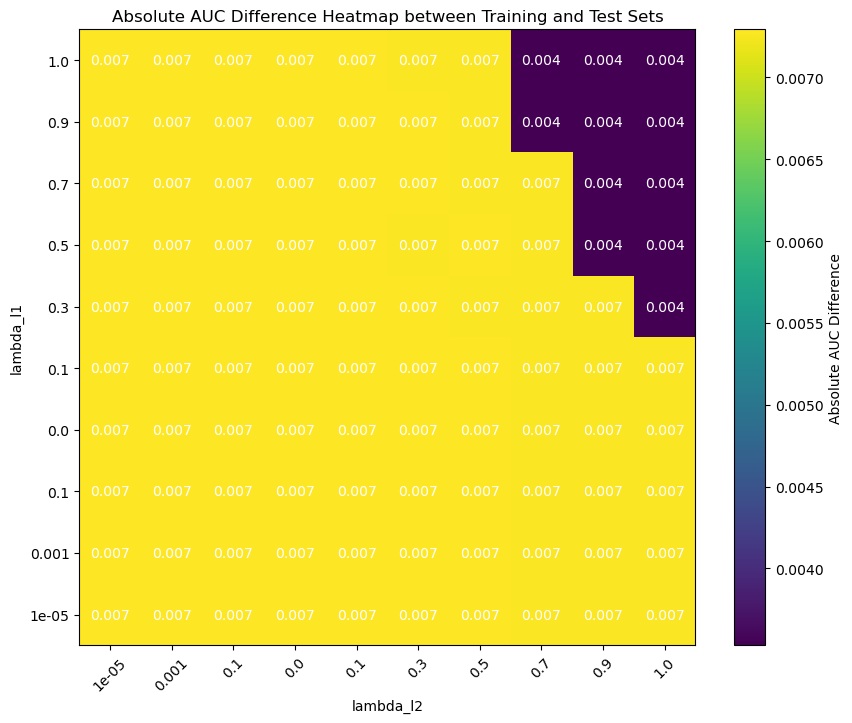

In [35]:
# Create an empty matrix to store the absolute differences in AUC between training and test sets
auc_diff_matrix = np.zeros((len(lambda_l1_values), len(lambda_l2_values)))

# Iterate over lambda_l1 and lambda_l2 and calculate AUC for training and test sets and their absolute differences
for i, lambda_l1 in enumerate(lambda_l1_values):
    for j, lambda_l2 in enumerate(lambda_l2_values):
        train_auc, test_auc = calculate_auc(train_X, train_y, test_X, test_y, lambda_l1, lambda_l2)
        auc_diff_matrix[i, j] = np.abs(train_auc - test_auc)

# Plot the heatmap of AUC differences
plt.figure(figsize=(10, 8))
plt.imshow(auc_diff_matrix, cmap='viridis', origin='lower')

# Add color bar
cbar = plt.colorbar(label='Absolute AUC Difference')

# Annotate the values
for i in range(len(lambda_l1_values)):
    for j in range(len(lambda_l2_values)):
        plt.text(j, i, "{:.3f}".format(auc_diff_matrix[i, j]), ha='center', va='center', color='white')

# Set axis labels and title
plt.xlabel('lambda_l2')
plt.ylabel('lambda_l1')
plt.xticks(np.arange(len(lambda_l2_values)), lambda_l2_values, rotation=45)
plt.yticks(np.arange(len(lambda_l1_values)), lambda_l1_values)
plt.title('Absolute AUC Difference Heatmap between Training and Test Sets')

# Show plot
plt.show()


In [36]:
# Find the top 15 combinations with the highest test set AUC
top_test_auc_combinations = []
sorted_test_auc_indices = np.dstack(np.unravel_index(np.argsort(test_auc_matrix.ravel()), test_auc_matrix.shape))[0][-15:]

# Print the top 15 combinations with the highest test set AUC
print("Top 15 combinations with highest test set AUC:")
for idx, (i, j) in enumerate(sorted_test_auc_indices[::-1], 1):
    lambda_l1 = lambda_l1_values[i]
    lambda_l2 = lambda_l2_values[j]
    top_test_auc_combinations.append((lambda_l1, lambda_l2))
    print(f"{idx}: lambda_l1={lambda_l1}, lambda_l2={lambda_l2}")


Top 15 combinations with highest test set AUC:
1: lambda_l1=1e-05, lambda_l2=1e-05
2: lambda_l1=0.1, lambda_l2=0.3
3: lambda_l1=0.5, lambda_l2=0.1
4: lambda_l1=0.5, lambda_l2=0.001
5: lambda_l1=0.5, lambda_l2=1e-05
6: lambda_l1=0.001, lambda_l2=0.5
7: lambda_l1=0.3, lambda_l2=0.3
8: lambda_l1=0.3, lambda_l2=0.1
9: lambda_l1=0.3, lambda_l2=0.0
10: lambda_l1=0.3, lambda_l2=0.1
11: lambda_l1=0.3, lambda_l2=0.001
12: lambda_l1=0.3, lambda_l2=1e-05
13: lambda_l1=0.1, lambda_l2=1e-05
14: lambda_l1=0.1, lambda_l2=0.001
15: lambda_l1=0.1, lambda_l2=0.1


min_split_gain = 0.0, Training AUC = 0.8812632579913686, Test AUC = 0.8885572139303481
min_split_gain = 0.1, Training AUC = 0.8812632579913686, Test AUC = 0.8885572139303481
min_split_gain = 0.2, Training AUC = 0.8812632579913686, Test AUC = 0.8885572139303481
min_split_gain = 0.3, Training AUC = 0.8812632579913686, Test AUC = 0.8885572139303481
min_split_gain = 0.4, Training AUC = 0.8812632579913686, Test AUC = 0.8885572139303481
min_split_gain = 0.5, Training AUC = 0.8812632579913686, Test AUC = 0.8885572139303481
min_split_gain = 0.6, Training AUC = 0.8812632579913686, Test AUC = 0.8885572139303481
min_split_gain = 0.7, Training AUC = 0.8812632579913686, Test AUC = 0.8885572139303481
min_split_gain = 0.8, Training AUC = 0.8812632579913686, Test AUC = 0.8885572139303481
min_split_gain = 0.9, Training AUC = 0.8812632579913686, Test AUC = 0.8885572139303481
min_split_gain = 1.0, Training AUC = 0.8812632579913686, Test AUC = 0.8885572139303481


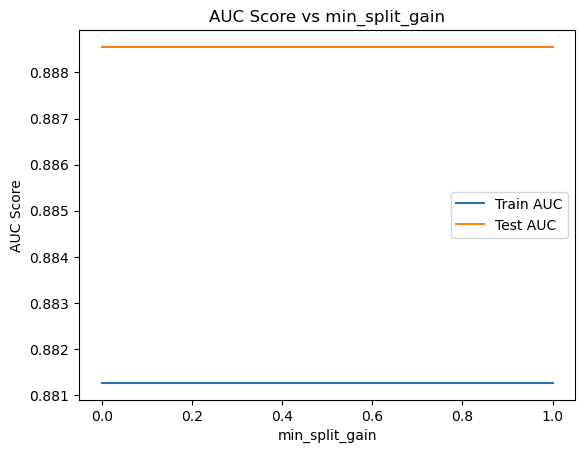

In [37]:
import lightgbm as lgb
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

# Create LightGBM classifier with the random_state parameter
best_LGBM = lgb.LGBMClassifier(random_state=321, verbose=-1)

# Define the parameter grid
param_grid = {
    'lambda_l1': [0.7],
    'lambda_l2': [1e-05],
    'learning_rate': [0.006],
    'n_estimators': [50],
    'max_depth': [4],
    'num_leaves': [12],
    'max_bin': [14],
    'min_data_in_leaf': [59],
    'feature_fraction': [0.9],
    'bagging_fraction': [0.6],
    'bagging_freq': [10]
}

# Store the training and test AUC scores for each parameter
train_auc_scores = []
test_auc_scores = []

# Iterate over the values of 'min_split_gain' parameter
for min_split_gain in [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]:
    param_grid['min_split_gain'] = [min_split_gain]  # Update the parameter grid
    
    # Use GridSearchCV for parameter search
    grid_search = GridSearchCV(estimator=best_LGBM, param_grid=param_grid, cv=10, scoring='roc_auc')
    grid_search.fit(train_X, train_y)
    
    # Get the best model
    best_model = grid_search.best_estimator_
    
    # Predict and calculate AUC on the training set
    train_pred_proba = best_model.predict_proba(train_X)[:, 1]
    train_auc = roc_auc_score(train_y, train_pred_proba)
    train_auc_scores.append(train_auc)
    
    # Predict and calculate AUC on the test set
    test_pred_proba = best_model.predict_proba(test_X)[:, 1]
    test_auc = roc_auc_score(test_y, test_pred_proba)
    test_auc_scores.append(test_auc)
    
    print(f"min_split_gain = {min_split_gain}, Training AUC = {train_auc}, Test AUC = {test_auc}")

# Visualize training and test AUC scores
plt.plot([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], train_auc_scores, label='Train AUC')
plt.plot([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], test_auc_scores, label='Test AUC')
plt.xlabel('min_split_gain')
plt.ylabel('AUC Score')
plt.legend()
plt.title('AUC Score vs min_split_gain')
plt.show()


In [ ]:
#record your parameters
param_grid = {
    'lambda_l1': [0.7],
    'lambda_l2': [1e-05],
    'learning_rate': [0.006],
    'n_estimators': [150],
    'max_depth': [5],
    'num_leaves': [26],
    'max_bin': [8],
    'min_data_in_leaf': [50],
    'feature_fraction': [0.6],
    'bagging_fraction': [0.8],
    'bagging_freq': [5]
}


In [38]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

# Create LightGBM classifier with the random_state parameter
best_LGBM = lgb.LGBMClassifier(random_state=321, verbose=-1)

param_grid = {
    'lambda_l1': [0.7],
    'lambda_l2': [1e-05],
    'learning_rate': [0.006],
    'n_estimators': [150],
    'max_depth': [5],
    'num_leaves': [26],
    'max_bin': [8],
    'min_data_in_leaf': [50],
    'feature_fraction': [0.6],
    'bagging_fraction': [0.8],
    'bagging_freq': [5],
    'min_split_gain': [0.1]
}

# Use grid search to find the best hyperparameter combination
grid_search = GridSearchCV(best_LGBM, param_grid=param_grid, cv=10, scoring='accuracy', n_jobs=-1)
grid_search.fit(train_X, train_y)

# Output the best parameters and corresponding performance
print("Best parameter combination:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)
best_params_LGBM = grid_search.best_params_


Best parameter combination: {'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.6, 'lambda_l1': 0.7, 'lambda_l2': 1e-05, 'learning_rate': 0.006, 'max_bin': 8, 'max_depth': 5, 'min_data_in_leaf': 50, 'min_split_gain': 0.1, 'n_estimators': 150, 'num_leaves': 26}
Best score: 0.8169340463458109


In [39]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
# Create LightGBM classifier with the random_state parameter
best_LGBM = lgb.LGBMClassifier(random_state=123, verbose=-1)

param_grid = {
    'lambda_l1': [0.7],
    'lambda_l2': [1e-05],
    'learning_rate': [0.005],
    'n_estimators': [600],
    'max_depth': [4],
    'num_leaves': [12],
    'max_bin': [14],
    'min_data_in_leaf': [32],
    'feature_fraction': [0.9],
    'bagging_fraction': [0.6],
    'bagging_freq': [10],
}

# Use grid search to find the best hyperparameter combination
grid_search = GridSearchCV(best_LGBM, param_grid=param_grid, cv=10, scoring='accuracy', n_jobs=-1)
grid_search.fit(train_X, train_y)

# Output the best parameters and corresponding performance
print("Best parameter combination:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)
best_params_LGBM = grid_search.best_params_

Best parameter combination: {'bagging_fraction': 0.6, 'bagging_freq': 10, 'feature_fraction': 0.9, 'lambda_l1': 0.7, 'lambda_l2': 1e-05, 'learning_rate': 0.005, 'max_bin': 14, 'max_depth': 4, 'min_data_in_leaf': 32, 'n_estimators': 600, 'num_leaves': 12}
Best score: 0.8198752228163994


In [41]:
# Set the model with the best parameters
best_LGBM.set_params(**best_params_LGBM)

# Fit the model with the best parameters
best_LGBM.fit(train_X, train_y)

LGBMClassifier(bagging_fraction=0.6, bagging_freq=10, feature_fraction=0.9,
               lambda_l1=0.7, lambda_l2=1e-05, learning_rate=0.005, max_bin=14,
               max_depth=4, min_data_in_leaf=32, n_estimators=600,
               num_leaves=12, random_state=123, verbose=-1)

In [43]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
train_y_pred = best_LGBM.predict(train_X)
train_accuracy = accuracy_score(train_y, train_y_pred)
print("Training Accuracy:", train_accuracy)
train_y_prob = best_LGBM.predict_proba(train_X)[:, 1]
train_auc = roc_auc_score(train_y, train_y_prob)
print("Training AUC：", train_auc)

Training Accuracy: 0.8378378378378378
Training AUC： 0.9172701338599956


In [44]:
y_score_LGBM = best_LGBM.predict_proba(test_X)[:, 1]
LGBM_y_pred=best_LGBM.predict(test_X)
test_accuracy = accuracy_score(test_y, LGBM_y_pred)
print("Test_accuracy:", test_accuracy)
fpr3, tpr3, threshold = roc_curve(test_y, y_score_LGBM)

# Calculate AUC
auc_value = auc(fpr3, tpr3)
print("Test AUC:", auc_value)

Test_accuracy: 0.823943661971831
Test AUC: 0.8920398009950249


In [45]:
def calculate_metrics(y_true, y_pred):
    tp = np.sum(np.logical_and(y_true == 1, y_pred == 1))
    tn = np.sum(np.logical_and(y_true == 0, y_pred == 0))
    fp = np.sum(np.logical_and(y_true == 0, y_pred == 1))
    fn = np.sum(np.logical_and(y_true == 1, y_pred == 0))
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    ppv = tp / (tp + fp)
    npv = tn / (tn + fn)
    predictive_accuracy = (tp + tn) / (tp + tn + fp + fn)
    mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
    return sensitivity, specificity, ppv, npv, predictive_accuracy, mcc

In [46]:
# Calculate various metrics for the training and test sets
sensitivity_train, specificity_train, ppv_train, npv_train, predictive_accuracy_train, mcc_train = calculate_metrics(train_y, train_y_pred)
sensitivity_test, specificity_test, ppv_test, npv_test, predictive_accuracy_test, mcc_test = calculate_metrics(test_y, LGBM_y_pred)

# Print the results
print("Train Set Metrics:")
print(f"Sensitivity: {sensitivity_train:.3f}")
print(f"Specificity: {specificity_train:.3f}")
print(f"PPV (Precision): {ppv_train:.3f}")
print(f"NPV: {npv_train:.3f}")
print(f"Predictive Accuracy: {predictive_accuracy_train:.3f}")
print(f"MCC: {mcc_train:.3f}")

print("\nTest Set Metrics:")
print(f"Sensitivity: {sensitivity_test:.3f}")
print(f"Specificity: {specificity_test:.3f}")
print(f"PPV (Precision): {ppv_test:.3f}")
print(f"NPV: {npv_test:.3f}")
print(f"Predictive Accuracy: {predictive_accuracy_test:.3f}")
print(f"MCC: {mcc_test:.3f}")



Train Set Metrics:
Sensitivity: 0.823
Specificity: 0.849
PPV (Precision): 0.812
NPV: 0.859
Predictive Accuracy: 0.838
MCC: 0.672

Test Set Metrics:
Sensitivity: 0.776
Specificity: 0.867
PPV (Precision): 0.839
NPV: 0.812
Predictive Accuracy: 0.824
MCC: 0.647


In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import auc, roc_curve, roc_auc_score
from sklearn.utils import resample

In [48]:
fpr_train, tpr_train, thresholds_train = roc_curve(train_y, train_y_prob)
fpr_test, tpr_test, thresholds_test = roc_curve(test_y, y_score_LGBM)

In [49]:
n_bootstraps = 1000
auc_scores_train = []
auc_scores_test = []

for i in range(n_bootstraps):
    # Perform bootstrap sampling on the training set
    train_y_sampled, train_y_prob_sampled = resample(train_y, train_y_prob)
    
    # Calculate the AUC for the sampled training set
    auc_scores_train.append(roc_auc_score(train_y_sampled, train_y_prob_sampled))
    
    # Perform bootstrap sampling on the validation set
    test_y_sampled, y_score_LGBM_sampled = resample(test_y, y_score_LGBM)
    
    # Calculate the AUC for the sampled validation set
    auc_scores_test.append(roc_auc_score(test_y_sampled, y_score_LGBM_sampled))

lower_bound_train = np.percentile(auc_scores_train, 2.5)
upper_bound_train = np.percentile(auc_scores_train, 97.5)
lower_bound_test = np.percentile(auc_scores_test, 2.5)
upper_bound_test = np.percentile(auc_scores_test, 97.5)

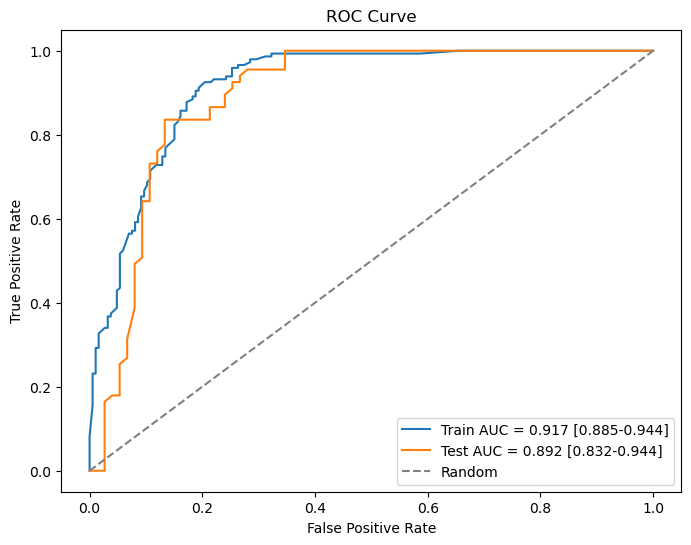

In [50]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'Train AUC = {train_auc:.3f} [{lower_bound_train:.3f}-{upper_bound_train:.3f}]')
plt.plot(fpr_test, tpr_test, label=f'Test AUC = {auc_value:.3f} [{lower_bound_test:.3f}-{upper_bound_test:.3f}]')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

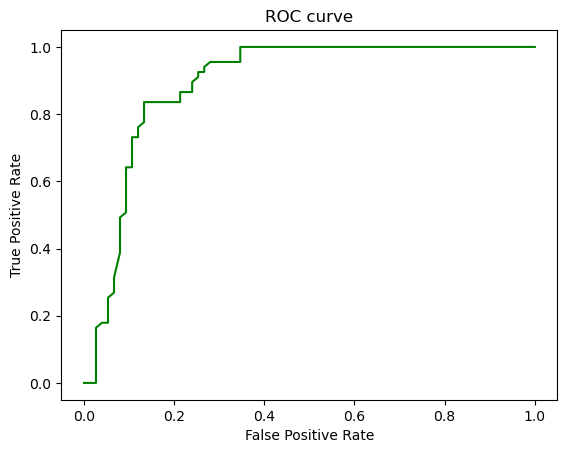

In [51]:
plt.figure()
lw = 2
plt.plot(fpr3, tpr3, color='green') 
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')  
plt.title('ROC curve')  
plt.show()

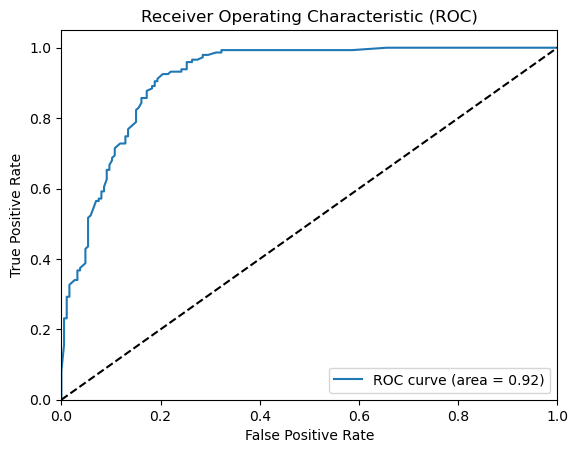

In [52]:
fpr, tpr, thresholds = roc_curve(train_y, train_y_prob)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % train_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [53]:
import numpy as np  
from scipy.stats import chi2_contingency  

def hosmer_lemeshow_test(test_y, LGBM_y_pred , num_groups=10):  
    # Sort the data based on predicted probabilities  
    sorted_indices = np.argsort( LGBM_y_pred)  
    sorted_y = test_y[sorted_indices]  
    
    # Create groups based on the sorted indices  
    group_size = len(sorted_y) // num_groups  
    group_bounds = np.arange(0, len(sorted_y) + 1, group_size)  
    
    # Calculate observed and expected counts for each group  
    observed_counts = np.zeros(num_groups)  
    expected_counts = np.zeros(num_groups)  
    
    total_positive = np.sum(sorted_y)  
    total_negative = len(sorted_y) - total_positive  
    
    for i in range(num_groups):  
        start, end = group_bounds[i], group_bounds[i + 1]  
        observed_counts[i] = np.sum(sorted_y[start:end])  
        expected_counts[i] = (end - start) * total_positive / len(sorted_y)  
        
    # Perform chi-squared test  
    chi2, p = chi2_contingency(np.array([observed_counts, expected_counts]).T)[:2]  
    
    dof = num_groups - 2  # Degrees of freedom for chi-squared test
      
    return chi2, p, dof  

chi2, p_value, dof = hosmer_lemeshow_test(test_y,LGBM_y_pred)  
print(f"Chi-squared: {chi2}")  
print(f"P-value: {p_value}")  
print(f"Degrees of freedom: {dof}")

# Judging the model calibration based on the p-value
if p_value < 0.05:
    print("Poor model calibration")
else:
    print("Good model calibration")

Chi-squared: 14.752584657314266
P-value: 0.09796011603922684
Degrees of freedom: 8
Good model calibration


In [54]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

# Create a LightGBM classifier, setting the random_state parameter
best_LGBM = lgb.LGBMClassifier(random_state=430, verbose=-1)

param_grid = {
        'lambda_l1': [0.7],
        'lambda_l2': [1e-05],
        'learning_rate': [0.005],
        'n_estimators': [600],
        'max_depth': [4],
        'num_leaves': [12],
        'max_bin': [14],
        'min_data_in_leaf': [32],
        'feature_fraction': [0.9],
        'bagging_fraction': [0.6],
        'bagging_freq': [10],
}

# Use grid search to find the best hyperparameter combination
grid_search = GridSearchCV(best_LGBM, param_grid=param_grid, cv=10, scoring='accuracy', n_jobs=-1)
grid_search.fit(train_X, train_y)

# Output the best parameters and corresponding performance
print("Best parameter combination:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)
best_params_LGBM = grid_search.best_params_

Best parameter combination: {'bagging_fraction': 0.6, 'bagging_freq': 10, 'feature_fraction': 0.9, 'lambda_l1': 0.7, 'lambda_l2': 1e-05, 'learning_rate': 0.005, 'max_bin': 14, 'max_depth': 4, 'min_data_in_leaf': 32, 'n_estimators': 600, 'num_leaves': 12}
Best score: 0.8169340463458111


In [55]:
# Set the model with the best parameters
best_LGBM.set_params(**best_params_LGBM)

# Fit the model using the best parameters
best_LGBM.fit(train_X, train_y)


LGBMClassifier(bagging_fraction=0.6, bagging_freq=10, feature_fraction=0.9,
               lambda_l1=0.7, lambda_l2=1e-05, learning_rate=0.005, max_bin=14,
               max_depth=4, min_data_in_leaf=32, n_estimators=600,
               num_leaves=12, random_state=430, verbose=-1)

In [56]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
train_y_pred = best_LGBM.predict(train_X)
train_accuracy = accuracy_score(train_y, train_y_pred)
print("Training Accuracy:", train_accuracy)
train_y_prob = best_LGBM.predict_proba(train_X)[:, 1]
train_auc = roc_auc_score(train_y, train_y_prob)
print("Training AUC：", train_auc)

Training Accuracy: 0.8348348348348348
Training AUC： 0.913868773315778


In [57]:
y_score_LGBM = best_LGBM.predict_proba(test_X)[:, 1]
LGBM_y_pred=best_LGBM.predict(test_X)
test_accuracy = accuracy_score(test_y, LGBM_y_pred)
print("Test_accuracy:", test_accuracy)
fpr3, tpr3, threshold = roc_curve(test_y, y_score_LGBM)

# Calculate AUC
auc_value = auc(fpr3, tpr3)
print("Test AUC:", auc_value)

Test_accuracy: 0.8169014084507042
Test AUC: 0.891044776119403


In [58]:
clf_1_list = [
    (best_LGBM, "best_LGBM")
]

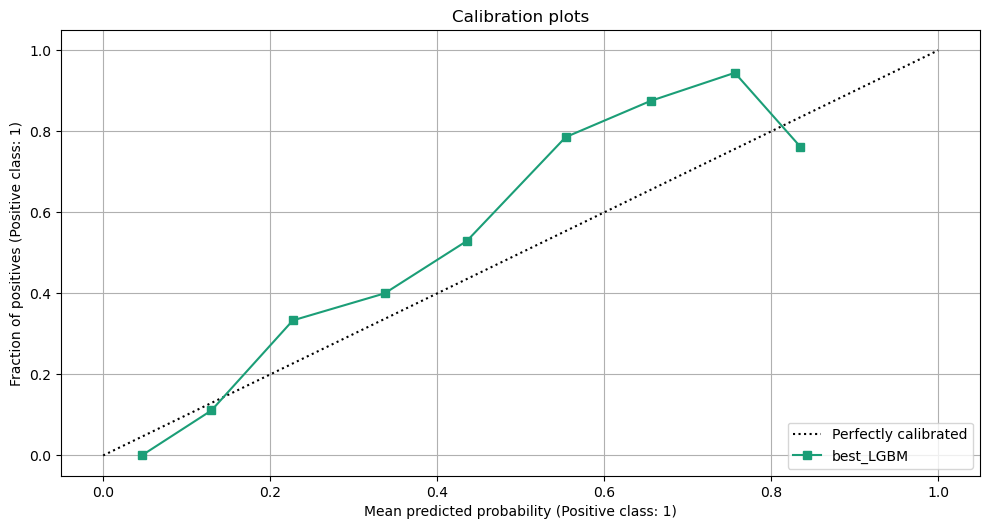

In [59]:
np.random.seed(321)
random.seed(321)

# Create the canvas and subplots
fig = plt.figure(figsize=(10, 10))
gs = GridSpec(4, 2)
colors = plt.get_cmap("Dark2")

# Create the subplot for the calibration curve
ax_calibration_curve = fig.add_subplot(gs[:2, :2])
ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration plots")

# Combine two classifier lists
combined_clf_list = list(clf_1_list)  # Assuming clf_list and clf_1_list are both lists of (classifier, name) tuples

# Plot the calibration curve for each classifier
for i, (clf, name) in enumerate(combined_clf_list):
    clf.fit(train_X, train_y)  # Train the model
    display = CalibrationDisplay.from_estimator(
        clf,  # Use the classifier model
        test_X,
        test_y,
        n_bins=10,
        name=name,
        ax=ax_calibration_curve,
        color=colors(i % colors.N),  # Cycle through colors
    )

plt.tight_layout()
# plt.savefig("CalibrationPlots1.pdf")  # Save as PDF
plt.show()  # Show the plot


In [60]:
y_pred =LGBM_y_pred

Model: best_LGBM, Trained model: LGBMClassifier(bagging_fraction=0.6, bagging_freq=10, feature_fraction=0.9,
               lambda_l1=0.7, lambda_l2=1e-05, learning_rate=0.005, max_bin=14,
               max_depth=4, min_data_in_leaf=32, n_estimators=600,
               num_leaves=12, random_state=430, verbose=-1)


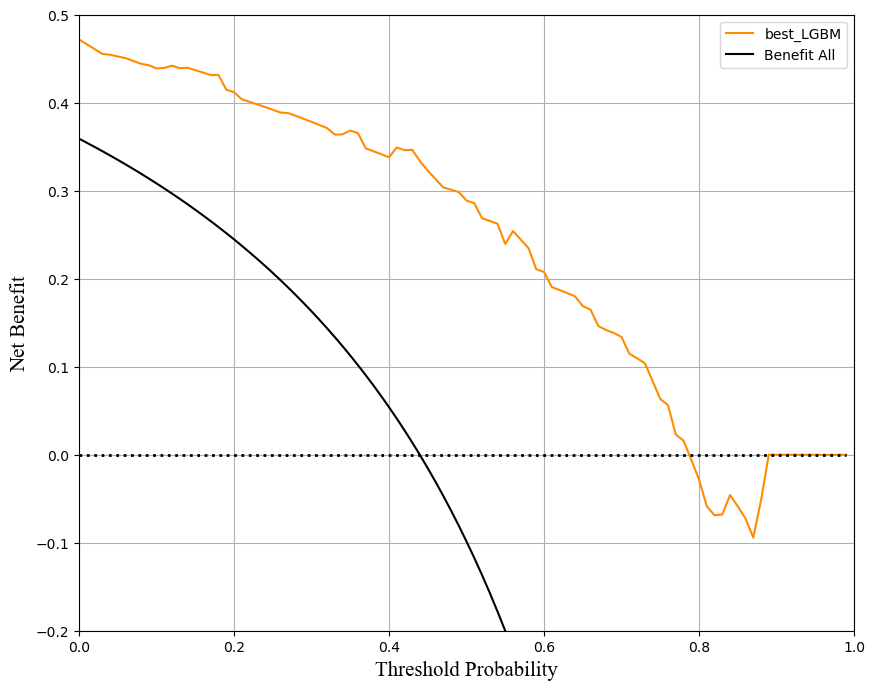

In [62]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
plt.figure(figsize=(10, 8))
np.random.seed(321)
random.seed(321)
 
models = [
    ("best_LGBM",best_LGBM)
]

def net_benefit_model(test_y,y_prob,thresh_group):
    total = test_y.shape[0]
    net_model = np.array([])
    for thresh in thresh_group:
        y_pred = y_prob > thresh
        tn, fp, fn, tp = confusion_matrix(test_y,y_pred).ravel()
        net_benefit = tp/total-fp/total*(thresh/(1-thresh))
        net_model = np.append(net_model,net_benefit)
    return net_model
 
def net_benefit_all(test_y,thresh_group):
    tn, fp, fn, tp = confusion_matrix(test_y,y_pred).ravel()
    total = test_y.shape[0]
    net_all = np.array([])
    for thresh in thresh_group:
        net_benefit = (tp)/total - (tn)/total*(thresh/(1-thresh))
        net_all = np.append(net_all, net_benefit)
    return net_all
 
thresh_group = []
for i in range(0,100,1):
    thresh = i/100
    thresh_group.append(thresh)
 
color = ["darkorange", "navy", "red", "green", "pink", "blue", "purple", "yellow", "cyan", "magenta", "brown", "olive", "teal"]
a = 0
benefit_all = net_benefit_all(test_y,thresh_group)
benefit_models = []
y2 = np.maximum(benefit_all, 0)
plt.xlim(0,1)
 
for name, model in models:
    clf = model.fit(train_X, train_y)
    print(f"Model: {name}, Trained model: {clf}")
    y_prob = clf.predict_proba(test_X)[:, 1]
    benefit_model = net_benefit_model(test_y, y_prob, thresh_group)
    plt.plot(thresh_group, benefit_model, color=color[a], label=name)
    a += 1
    benefit_models.append(benefit_model)

 
plt.plot(thresh_group, benefit_all, color='black', label='Benefit All')
plt.plot(thresh_group, np.zeros(len(thresh_group)), color='k', lw=2, linestyle=':')

plt.ylim(-0.2, 0.5)  # Adjusts the y-axis range
plt.xlabel('Threshold Probability', fontdict={'family': 'Times New Roman', 'fontsize': 15})
plt.ylabel('Net Benefit', fontdict={'family': 'Times New Roman', 'fontsize': 15})

plt.grid('major')

# Get the current axes, allowing access to the spines
#ax = plt.gca()

# Set spine colors
#ax.spines['right'].set_color((0.8, 0.8, 0.8))
#ax.spines['top'].set_color((0.8, 0.8, 0.8))

plt.legend(loc='upper right')

# To save the plot as a PDF
#plt.savefig('C:/Users/12292/Desktop/myplo1t.pdf', format='pdf')

plt.show()

IndexError: index 4 is out of bounds for axis 0 with size 4

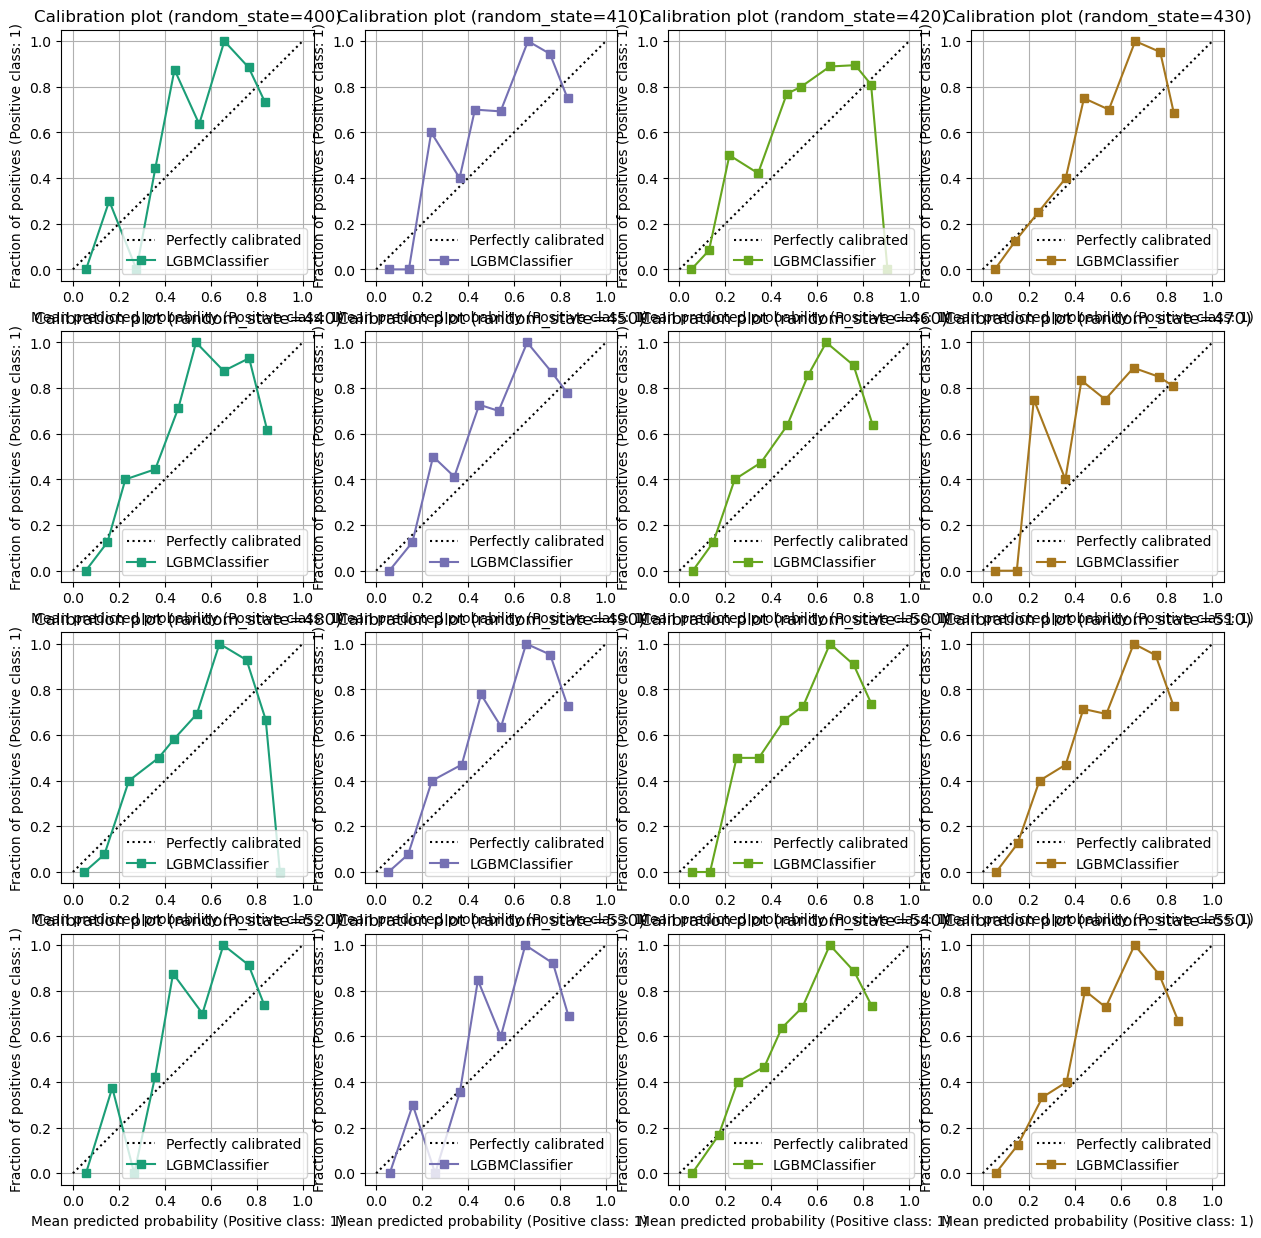

In [63]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.calibration import CalibrationDisplay
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np

# Assume train_X, train_y, test_X, test_y are defined
fig = plt.figure(figsize=(15, 15))  # Adjust the figure size as needed
gs = GridSpec(4, 4)  # Reduce the number of rows to 4 to accommodate the range

colors = plt.get_cmap("Dark2")

for idx, n in enumerate(range(400, 650, 10)):  # Adjusted loop bounds
    clf = lgb.LGBMClassifier(random_state=n, verbose=-1)

    param_grid = {
        'lambda_l1': [0.7],
        'lambda_l2': [1e-05],
        'learning_rate': [0.005],
        'n_estimators': [600],
        'max_depth': [4],
        'num_leaves': [12],
        'max_bin': [13],
        'min_data_in_leaf': [32],
        'feature_fraction': [0.9],
        'bagging_fraction': [0.6],
        'bagging_freq': [10],
    }

    grid_search = GridSearchCV(clf, param_grid, cv=10, n_jobs=-1)
    grid_search.fit(train_X, train_y)
    best_params_LGBM = grid_search.best_params_

    clf.set_params(**best_params_LGBM)
    clf.fit(train_X, train_y)

    # Calculate subplot indices based on idx
    row_index = idx // 4
    col_index = idx % 4

    ax_calibration_curve = fig.add_subplot(gs[row_index, col_index])
    ax_calibration_curve.grid()
    ax_calibration_curve.set_title(f"Calibration plot (random_state={n})")

    display = CalibrationDisplay.from_estimator(
        clf,
        test_X,
        test_y,
        n_bins=10,
        ax=ax_calibration_curve,
        color=colors(n % colors.N)
    )

plt.tight_layout()
plt.show()